## Problem Statement

#### Conduct state wise trend analysis of the given sales.
#### To identify other reasons if they are influencing Pesticide sales.
#### This case study is to provide state wise forecast of Pesticide sales for ABC Manufacturing. Time Series analysis is done using different methods - Holt Winters, ARMIA, Seasonal ARIMA and FbProphet.

## Sales Forecasting of Pesticides in different States

### Importing the necessary libraries 

In [1]:
import pandas as pd              # Pandas is used for Data Manipulation and Analysis
import numpy as np               # Numpy is used for mathematical operations on multi-dimensional array, matrices, linear algebra etc
import matplotlib.pyplot as plt  # Matploltlib is build on Numpy for Data Visualization of 2D or 3D plots.
%matplotlib inline
import seaborn as sns            # Seaborn is based on Matplotlib for the graphical representaion of statistical plots
import warnings
warnings.filterwarnings("ignore")# Supress display of Warnings
from pylab import rcParams
rcParams['figure.figsize'] = 15,8# Displays plot of given figure size
import statsmodels.api as sm     # Statsmodels.api for conducting statistical tests, and statistical data exploration
from matplotlib.dates import MonthLocator, DateFormatter # Locates months and use best formats for Date,uses strftime format strings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pandas.plotting import autocorrelation_plot

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

## Importing Dataset

In [3]:
data = pd.read_excel('Sales_Forecast_Data.xlsx') # Reading the dataset and importing into Pandas DataFrame

## Data Preprocessing

In [4]:
data.info() # Displays all the Data information like column names, non-null counts and Data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230152 entries, 0 to 230151
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FIN_YEAR  230152 non-null  object 
 1   MONTH     230152 non-null  object 
 2   STATE     230152 non-null  object 
 3   FG        230152 non-null  object 
 4   DISTRICT  230152 non-null  object 
 5   COMPANY   230152 non-null  object 
 6   VALUE     230152 non-null  float64
dtypes: float64(1), object(6)
memory usage: 12.3+ MB


In [5]:
data.shape # Displays no of rows and columns for the Dataset

(230152, 7)

Observed no Missing Values in the Dataset

In [6]:
data.head() # Displays the first 5 rows of the Dataset

FIN_YEAR MONTH    STATE            FG DISTRICT  COMPANY    VALUE
0  2014-2015   Nov  Haryana  Insecticides   Rohtak  monous    675.00
1  2014-2015   Nov  Haryana  Insecticides   Rewari  monous     73.71
2  2014-2015   Nov  Haryana  Insecticides  Gurgaon  monous    405.00
3  2014-2015   Nov  Haryana  Insecticides    Mewat  monous   1188.00
4  2014-2015   Nov  Haryana  Insecticides   Palwal  monous   5188.59

In [7]:
data.describe(include = 'all') # Displays all the numerical and categorical details

FIN_YEAR   MONTH          STATE            FG DISTRICT  \
count      230152  230152         230152        230152   230152   
unique          4      12              5             4      142   
top     2016-2017     Nov  Uttar Pradesh  Bactericides   Karnal   
freq        76280   23864         122644         57538     4308   
mean          NaN     NaN            NaN           NaN      NaN   
std           NaN     NaN            NaN           NaN      NaN   
min           NaN     NaN            NaN           NaN      NaN   
25%           NaN     NaN            NaN           NaN      NaN   
50%           NaN     NaN            NaN           NaN      NaN   
75%           NaN     NaN            NaN           NaN      NaN   
max           NaN     NaN            NaN           NaN      NaN   

                  COMPANY          VALUE  
count              230152  230152.000000  
unique                 47            NaN  
top     ABC Manufacturing            NaN  
freq                28640            NaN  
mean                  NaN     704.973592  
std                   NaN    2261.623760  
min                   NaN       0.000000  
25%                   NaN       0.000000  
50%                   NaN       0.000000  
75%                   NaN     269.865000  
max                   NaN   69828.750000

In [8]:
data.describe(include = object) # Displays all the categorical details

FIN_YEAR   MONTH          STATE            FG DISTRICT  \
count      230152  230152         230152        230152   230152   
unique          4      12              5             4      142   
top     2016-2017     Nov  Uttar Pradesh  Bactericides   Karnal   
freq        76280   23864         122644         57538     4308   

                  COMPANY  
count              230152  
unique                 47  
top     ABC Manufacturing  
freq                28640

In [9]:
data.describe() # Only one numerical column and its is target variable

VALUE
count  230152.000000
mean      704.973592
std      2261.623760
min         0.000000
25%         0.000000
50%         0.000000
75%       269.865000
max     69828.750000

## Data Cleaning

In [10]:
data.columns[:-1] # Displays all the columns names except the last column name

Index(['FIN_YEAR', 'MONTH', 'STATE', 'FG', 'DISTRICT', 'COMPANY'], dtype='object')

In [11]:
for x in data.columns[:-1]:        # Strip function to use on the string datatype columns to strip the trailing
    data[x] = data[x].str.strip()  # and leading spaces in the dataframe columns
                                   # Select all the columns except the Value which is numerical

In [12]:
data.head() # Displays first 5 rows

FIN_YEAR MONTH    STATE            FG DISTRICT COMPANY    VALUE
0  2014-2015   Nov  Haryana  Insecticides   Rohtak  monous   675.00
1  2014-2015   Nov  Haryana  Insecticides   Rewari  monous    73.71
2  2014-2015   Nov  Haryana  Insecticides  Gurgaon  monous   405.00
3  2014-2015   Nov  Haryana  Insecticides    Mewat  monous  1188.00
4  2014-2015   Nov  Haryana  Insecticides   Palwal  monous  5188.59

In [13]:
data.duplicated().sum() # Checking duplicates in the dataset

11968

In [14]:
data_dup = data[data.duplicated()]
data_dup.head(10)                     # Displaying the first 10 duplicates rows

FIN_YEAR MONTH    STATE            FG DISTRICT      COMPANY  VALUE
24952  2016-2017   Jun  Haryana  Insecticides  Kaithal  insulescent    0.0
25082  2016-2017   Jun  Haryana  Insecticides   Karnal        scire    0.0
25088  2016-2017   Jun  Haryana  Insecticides   Karnal    disescent    0.0
25094  2016-2017   Jun  Haryana  Insecticides   Karnal      intravu    0.0
25098  2016-2017   Jun  Haryana  Insecticides   Karnal  insulescent    0.0
25099  2016-2017   Jun  Haryana  Insecticides   Karnal        scire    0.0
25101  2016-2017   Jun  Haryana  Insecticides   Karnal        biore    0.0
25108  2016-2017   Jun  Haryana  Insecticides   Karnal    disescent    0.0
25110  2016-2017   Jun  Haryana  Insecticides   Karnal        scire    0.0
25116  2016-2017   Jun  Haryana  Insecticides   Karnal  insulescent    0.0

In [15]:
data.drop_duplicates(keep = 'first', inplace = True) # Drop all the duplicates leaving the first rows each one's

In [16]:
data.duplicated().sum() # No Duplicate values now

0

In [17]:
data.shape # Shows no of columns and rows

(218184, 7)

In [18]:
index_names = data[data['VALUE'] == 0].index # To get the indexes for which the Column Value has value of Zero
                                             # Created list of rows which the VALUE column is Zero

In [19]:
index_names.value_counts().sum() # Number of rows having zero value of Column - "VALUE"

133621

In [20]:
data.drop(index_names, inplace = True) # Drop these row indexes from the Data frame

In [21]:
data[data['VALUE'] == 0].value_counts() # Displays no of zero values in Column 'VALUE'

Series([], dtype: int64)

In [22]:
data.shape # Shape of the dataframe after removing zero values of Column - "VALUE" and Duplicates

(84563, 7)

In [23]:
data['FG'].unique() # Displays different categories in FG column

array(['Insecticides', 'Herbicides', 'Rodenticides', 'Bactericides'],
      dtype=object)

In [24]:
data['FG'].value_counts()# Displays no of counts/rows for each category

Insecticides    41538
Rodenticides    25052
Herbicides       9101
Bactericides     8872
Name: FG, dtype: int64

In [25]:
# Converting all the categorical names in FG to Pesticides ( Single Category)
data["FG"].replace({"Bactericides": "Pesticides", "Insecticides": "Pesticides",
                    "Herbicides": "Pesticides","Rodenticides": "Pesticides"}, inplace=True)

In [26]:
data['FG'].value_counts() # No of rows with Pesticides column - all rows for FG column are changed

Pesticides    84563
Name: FG, dtype: int64

In [27]:
data.drop(['DISTRICT'], axis = 1, inplace = True) # As we are not considering the different districts we are 
                                                  # dropping that column

## Data Filtering

In [28]:
d_state = data.groupby('STATE') # applying groupby() function to group the data on State Wise
d_state.first() # first entries in all the States

FIN_YEAR MONTH          FG  COMPANY   VALUE
STATE                                                         
Haryana           2014-2015   Nov  Pesticides   monous   675.0
Himachal Pradesh  2014-2015   Jun  Pesticides    trita   645.3
Punjab            2014-2015   Feb  Pesticides   zooloo  1957.5
Uttar Pradesh     2014-2015   Apr  Pesticides  venible   270.0
Uttarakhand       2014-2015   Jun  Pesticides   monous  1641.6

In [29]:
d_state.head(15) # Displays first 15 rows

FIN_YEAR MONTH             STATE          FG            COMPANY  \
0     2014-2015   Nov           Haryana  Pesticides             monous   
1     2014-2015   Nov           Haryana  Pesticides             monous   
2     2014-2015   Nov           Haryana  Pesticides             monous   
3     2014-2015   Nov           Haryana  Pesticides             monous   
4     2014-2015   Nov           Haryana  Pesticides             monous   
17    2014-2015   Dec           Haryana  Pesticides             cynoid   
18    2014-2015   Dec           Haryana  Pesticides             cynoid   
22    2014-2015   Dec           Haryana  Pesticides             cynoid   
23    2014-2015   Dec           Haryana  Pesticides             cynoid   
24    2014-2015   Dec           Haryana  Pesticides             cynoid   
25    2014-2015   Dec           Haryana  Pesticides             cynoid   
26    2014-2015   Dec           Haryana  Pesticides           exicious   
27    2014-2015   Dec           Haryana  Pesticides           exicious   
28    2014-2015   Dec           Haryana  Pesticides           exicious   
29    2014-2015   Dec           Haryana  Pesticides           exicious   
138   2014-2015   Jun  Himachal Pradesh  Pesticides              trita   
139   2014-2015   Jun  Himachal Pradesh  Pesticides              trita   
140   2014-2015   Jun  Himachal Pradesh  Pesticides              trita   
141   2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
142   2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
143   2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
144   2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
145   2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
146   2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
147   2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
148   2014-2015   Jul  Himachal Pradesh  Pesticides              trita   
149   2014-2015   Jul  Himachal Pradesh  Pesticides              trita   
150   2014-2015   Jul  Himachal Pradesh  Pesticides              trita   
151   2014-2015   Jul  Himachal Pradesh  Pesticides              trita   
152   2014-2015   Jul  Himachal Pradesh  Pesticides              trita   
1948  2014-2015   Feb            Punjab  Pesticides             zooloo   
1949  2014-2015   Feb            Punjab  Pesticides             zooloo   
1950  2014-2015   Feb            Punjab  Pesticides             zooloo   
1951  2014-2015   Feb            Punjab  Pesticides             zooloo   
1952  2014-2015   Feb            Punjab  Pesticides             zooloo   
1953  2014-2015   Feb            Punjab  Pesticides             zooloo   
1954  2014-2015   Feb            Punjab  Pesticides             zooloo   
1955  2014-2015   Feb            Punjab  Pesticides              unimm   
1956  2014-2015   Feb            Punjab  Pesticides              unimm   
1957  2014-2015   Feb            Punjab  Pesticides              unimm   
1958  2014-2015   Feb            Punjab  Pesticides              unimm   
1959  2014-2015   Feb            Punjab  Pesticides              unimm   
1960  2014-2015   Feb            Punjab  Pesticides              unimm   
1961  2014-2015   Feb            Punjab  Pesticides              unimm   
1962  2014-2015   Feb            Punjab  Pesticides              unimm   
2030  2014-2015   Apr     Uttar Pradesh  Pesticides            venible   
2031  2014-2015   Apr     Uttar Pradesh  Pesticides            venible   
2032  2014-2015   Apr     Uttar Pradesh  Pesticides            venible   
2050  2014-2015   Aug     Uttar Pradesh  Pesticides             monous   
2051  2014-2015   Aug     Uttar Pradesh  Pesticides             monous   
2052  2014-2015   Aug     Uttar Pradesh  Pesticides             monous   
2053  2014-2015   Aug     Uttar Pradesh  Pesticides             monous   
2054  2014-2015   Aug     Uttar Pradesh  Pesticides             monous   
2055  2014-

In [30]:
data_state_company = data.groupby(['STATE','COMPANY']) # Forming groups based on more than one category

In [31]:
data_state_company.head() # Displays the first rows of each category

FIN_YEAR MONTH             STATE          FG            COMPANY  \
0       2014-2015   Nov           Haryana  Pesticides             monous   
1       2014-2015   Nov           Haryana  Pesticides             monous   
2       2014-2015   Nov           Haryana  Pesticides             monous   
3       2014-2015   Nov           Haryana  Pesticides             monous   
4       2014-2015   Nov           Haryana  Pesticides             monous   
17      2014-2015   Dec           Haryana  Pesticides             cynoid   
18      2014-2015   Dec           Haryana  Pesticides             cynoid   
22      2014-2015   Dec           Haryana  Pesticides             cynoid   
23      2014-2015   Dec           Haryana  Pesticides             cynoid   
24      2014-2015   Dec           Haryana  Pesticides             cynoid   
26      2014-2015   Dec           Haryana  Pesticides           exicious   
27      2014-2015   Dec           Haryana  Pesticides           exicious   
28      2014-2015   Dec           Haryana  Pesticides           exicious   
29      2014-2015   Dec           Haryana  Pesticides           exicious   
30      2014-2015   Dec           Haryana  Pesticides           exicious   
35      2014-2015   Dec           Haryana  Pesticides            venible   
36      2014-2015   Dec           Haryana  Pesticides            venible   
37      2014-2015   Dec           Haryana  Pesticides            venible   
38      2014-2015   Dec           Haryana  Pesticides            venible   
39      2014-2015   Dec           Haryana  Pesticides            venible   
49      2014-2015   Dec           Haryana  Pesticides  ABC Manufacturing   
50      2014-2015   Dec           Haryana  Pesticides  ABC Manufacturing   
51      2014-2015   Dec           Haryana  Pesticides  ABC Manufacturing   
52      2014-2015   Dec           Haryana  Pesticides  ABC Manufacturing   
53      2014-2015   Dec           Haryana  Pesticides  ABC Manufacturing   
64      2014-2015   Dec           Haryana  Pesticides          disescent   
65      2014-2015   Dec           Haryana  Pesticides          disescent   
66      2014-2015   Dec           Haryana  Pesticides          disescent   
67      2014-2015   Dec           Haryana  Pesticides          disescent   
68      2014-2015   Dec           Haryana  Pesticides          disescent   
79      2014-2015   Dec           Haryana  Pesticides               janu   
80      2014-2015   Dec           Haryana  Pesticides               janu   
81      2014-2015   Dec           Haryana  Pesticides           idiombee   
82      2014-2015   Dec           Haryana  Pesticides           idiombee   
84      2014-2015   Dec           Haryana  Pesticides           idiombee   
95      2014-2015   Jul           Haryana  Pesticides               janu   
96      2014-2015   Jul           Haryana  Pesticides               janu   
97      2014-2015   Jul           Haryana  Pesticides               janu   
99      2014-2015   Jul           Haryana  Pesticides           idiombee   
100     2014-2015   Jul           Haryana  Pesticides           idiombee   
129     2014-2015   Jul           Haryana  Pesticides              trita   
130     2014-2015   Jul           Haryana  Pesticides              trita   
131     2014-2015   Jul           Haryana  Pesticides              trita   
132     2014-2015   Jul           Haryana  Pesticides              trita   
133     2014-2015   Jul           Haryana  Pesticides              trita   
138     2014-2015   Jun  Himachal Pradesh  Pesticides              trita   
139     2014-2015   Jun  Himachal Pradesh  Pesticides              trita   
140     2014-2015   Jun  Himachal Pradesh  Pesticides              trita   
141     2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
142     2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
143     2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
144     2014-2015   Jul  Himachal Pradesh  Pesticides  AB

In [32]:
data_state_company_year = data.groupby(['STATE','COMPANY','FIN_YEAR'])
                                                      # Forming groups based on more than two categories

In [33]:
data_state_company_year.head() # Displays the first five rows of each groupby

FIN_YEAR MONTH             STATE          FG            COMPANY  \
0       2014-2015   Nov           Haryana  Pesticides             monous   
1       2014-2015   Nov           Haryana  Pesticides             monous   
2       2014-2015   Nov           Haryana  Pesticides             monous   
3       2014-2015   Nov           Haryana  Pesticides             monous   
4       2014-2015   Nov           Haryana  Pesticides             monous   
17      2014-2015   Dec           Haryana  Pesticides             cynoid   
18      2014-2015   Dec           Haryana  Pesticides             cynoid   
22      2014-2015   Dec           Haryana  Pesticides             cynoid   
23      2014-2015   Dec           Haryana  Pesticides             cynoid   
24      2014-2015   Dec           Haryana  Pesticides             cynoid   
26      2014-2015   Dec           Haryana  Pesticides           exicious   
27      2014-2015   Dec           Haryana  Pesticides           exicious   
28      2014-2015   Dec           Haryana  Pesticides           exicious   
29      2014-2015   Dec           Haryana  Pesticides           exicious   
30      2014-2015   Dec           Haryana  Pesticides           exicious   
35      2014-2015   Dec           Haryana  Pesticides            venible   
36      2014-2015   Dec           Haryana  Pesticides            venible   
37      2014-2015   Dec           Haryana  Pesticides            venible   
38      2014-2015   Dec           Haryana  Pesticides            venible   
39      2014-2015   Dec           Haryana  Pesticides            venible   
49      2014-2015   Dec           Haryana  Pesticides  ABC Manufacturing   
50      2014-2015   Dec           Haryana  Pesticides  ABC Manufacturing   
51      2014-2015   Dec           Haryana  Pesticides  ABC Manufacturing   
52      2014-2015   Dec           Haryana  Pesticides  ABC Manufacturing   
53      2014-2015   Dec           Haryana  Pesticides  ABC Manufacturing   
64      2014-2015   Dec           Haryana  Pesticides          disescent   
65      2014-2015   Dec           Haryana  Pesticides          disescent   
66      2014-2015   Dec           Haryana  Pesticides          disescent   
67      2014-2015   Dec           Haryana  Pesticides          disescent   
68      2014-2015   Dec           Haryana  Pesticides          disescent   
79      2014-2015   Dec           Haryana  Pesticides               janu   
80      2014-2015   Dec           Haryana  Pesticides               janu   
81      2014-2015   Dec           Haryana  Pesticides           idiombee   
82      2014-2015   Dec           Haryana  Pesticides           idiombee   
84      2014-2015   Dec           Haryana  Pesticides           idiombee   
95      2014-2015   Jul           Haryana  Pesticides               janu   
96      2014-2015   Jul           Haryana  Pesticides               janu   
97      2014-2015   Jul           Haryana  Pesticides               janu   
99      2014-2015   Jul           Haryana  Pesticides           idiombee   
100     2014-2015   Jul           Haryana  Pesticides           idiombee   
129     2014-2015   Jul           Haryana  Pesticides              trita   
130     2014-2015   Jul           Haryana  Pesticides              trita   
131     2014-2015   Jul           Haryana  Pesticides              trita   
132     2014-2015   Jul           Haryana  Pesticides              trita   
133     2014-2015   Jul           Haryana  Pesticides              trita   
138     2014-2015   Jun  Himachal Pradesh  Pesticides              trita   
139     2014-2015   Jun  Himachal Pradesh  Pesticides              trita   
140     2014-2015   Jun  Himachal Pradesh  Pesticides              trita   
141     2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
142     2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
143     2014-2015   Jul  Himachal Pradesh  Pesticides  ABC Manufacturing   
144     2014-2015   Jul  Himachal Pradesh  Pesticides  AB

In [34]:
data_state_company_year_month = data.groupby(['STATE','COMPANY','FIN_YEAR','MONTH'])
                                               # Forming groups based on more than three categories 

In [35]:
#Dispalys Total Sales Amount by monthly for specific financial year, for each company individually in each State

data_state_company_year_month['VALUE'].agg([np.sum]) 

sum
STATE            COMPANY           FIN_YEAR  MONTH              
Haryana          ABC Manufacturing 2014-2015 Apr    3.257766e+04
                                             Aug    1.071465e+05
                                             Dec    1.276569e+05
                                             Feb    1.074271e+05
                                             Jan    1.280788e+05
                                             Jul    7.547108e+04
                                             Jun    1.306842e+05
                                             Mar    1.103429e+05
                                             May    4.748274e+04
                                             Nov    1.757109e+05
                                             Oct    1.680450e+05
                                             Sep    1.382327e+05
                                   2015-2016 Apr    1.317206e+05
                                             Aug    1.293018e+05
                                             Dec    1.520721e+05
                                             Feb    7.313976e+04
                                             Jan    7.534188e+04
                                             Jul    1.326937e+05
                                             Jun    1.602658e+05
                                             Mar    1.069027e+05
                                             May    1.499684e+05
                                             Nov    1.636201e+05
                                             Oct    3.133215e+05
                                             Sep    1.377741e+05
                                   2016-2017 Apr    1.613128e+04
                                             Aug    1.006873e+05
                                             Dec    1.569266e+05
                                             Feb    5.835172e+04
                                             Jan    8.449231e+04
                                             Jul    1.145984e+05
                                             Jun    1.446451e+05
                                             Mar    1.156892e+05
                                             May    6.332013e+04
                                             Nov    1.545550e+05
                                             Oct    1.202329e+05
                                             Sep    2.016610e+05
                                   2017-2018 Apr    1.130909e+04
                                             Aug    8.035713e+04
                                             Dec    2.007335e+05
                                             Jan    1.455822e+05
                                             Jul    9.793494e+04
                                             Jun    1.710176e+05
                                             May    1.107250e+05
                                             Nov    2.137112e+05
                                             Oct    1.355607e+05
                                             Sep    9.288500e+04
                 agizu             2014-2015 Dec    8.887604e+04
                                             Feb    2.566903e+04
                                             Jan    1.577192e+04
                                             Mar    1.736302e+04
                                             Nov    9.332145e+03
                                             Oct    2.130071e+04
                                   2015-2016 Apr    2.400800e+04
                                             Aug    2.583131e+04
                                             Dec    3.422318e+04
                                             Feb    7.978500e+01
                                             Jul    9.292320e+03
                                             Jun    8.980200e+03
                                             Mar    3.241350e+02
                                             May    1.644030e+04
                               

In [36]:
data1 = data_state_company_year_month['VALUE'].agg([np.sum]) # Assigned to another dataframe name

In [37]:
data1.head() # Displays the first 46 rows (all the rows) which are of the same ABC Manufacturing company
               # Total Sales Amount by monthly for specific financial year in Haryana State

sum
STATE   COMPANY           FIN_YEAR  MONTH            
Haryana ABC Manufacturing 2014-2015 Apr     32577.660
                                    Aug    107146.530
                                    Dec    127656.945
                                    Feb    107427.060
                                    Jan    128078.820

In [38]:
data1['Monthly Sales Value']=np.round(data1['sum'],decimals=2)#Creating a col-Monthly Sales Value from col-sum
                                                           # And rounding of the values to 2 decimals

In [39]:
data1.drop(['sum'], axis =1, inplace = True) # Drop the sm column as we have created another column

In [40]:
data1.head() # Displays the first 5 rows

Monthly Sales Value
STATE   COMPANY           FIN_YEAR  MONTH                     
Haryana ABC Manufacturing 2014-2015 Apr               32577.66
                                    Aug              107146.53
                                    Dec              127656.94
                                    Feb              107427.06
                                    Jan              128078.82

In [41]:
data1.to_csv("data2.csv") # Saving the dataframe to CSV file - data2

In [42]:
data2 = pd.read_csv('data2.csv') # Reading/importing CSV file data2.csv

In [43]:
data2.head() # Displays the first 5 rows of the dataframe

STATE            COMPANY   FIN_YEAR MONTH  Monthly Sales Value
0  Haryana  ABC Manufacturing  2014-2015   Apr             32577.66
1  Haryana  ABC Manufacturing  2014-2015   Aug            107146.53
2  Haryana  ABC Manufacturing  2014-2015   Dec            127656.94
3  Haryana  ABC Manufacturing  2014-2015   Feb            107427.06
4  Haryana  ABC Manufacturing  2014-2015   Jan            128078.82

## Feature Engineering

In [44]:
data2.shape # Displays the no of rows and columns after aggregation

(2735, 5)

In [45]:
data2['Y1']=data2['FIN_YEAR'].apply(lambda x:x[0:4]) # Splitting the FIN_YEAR column into 2 separate years
                                                     # as it combine of 2 years with hypen
                                                     # Y1 column contains the first year in the FIN_YEAR

In [46]:
data2['Y2']=data2['FIN_YEAR'].apply(lambda x:x[5:])  # Splitting the FIN_YEAR column into 2 separate years
                                                     # as it combine of 2 years with hypen
                                                     # Y2 column contains the second year in the FIN_YEAR

In [47]:
data2.head() # Displays the first 5 rows after spliting the FIN_YEAR

STATE            COMPANY   FIN_YEAR MONTH  Monthly Sales Value    Y1  \
0  Haryana  ABC Manufacturing  2014-2015   Apr             32577.66  2014   
1  Haryana  ABC Manufacturing  2014-2015   Aug            107146.53  2014   
2  Haryana  ABC Manufacturing  2014-2015   Dec            127656.94  2014   
3  Haryana  ABC Manufacturing  2014-2015   Feb            107427.06  2014   
4  Haryana  ABC Manufacturing  2014-2015   Jan            128078.82  2014   

     Y2  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015

In [48]:
# AS we have FIN_YEAR before and it is financial year for a company, as it starts 
# from April to March of succeeding, we need to allocate month and year subsequetly.

data2['Year'] = data2.apply(lambda x : x['Y1'] if x['MONTH'] not in ('Feb','Mar','Jan') else x['Y2'], axis = 1)

In [49]:
data2.head(10) # Displays first 20rows to check the corresponding year and month are allocated correctly or not

STATE            COMPANY   FIN_YEAR MONTH  Monthly Sales Value    Y1  \
0  Haryana  ABC Manufacturing  2014-2015   Apr             32577.66  2014   
1  Haryana  ABC Manufacturing  2014-2015   Aug            107146.53  2014   
2  Haryana  ABC Manufacturing  2014-2015   Dec            127656.94  2014   
3  Haryana  ABC Manufacturing  2014-2015   Feb            107427.06  2014   
4  Haryana  ABC Manufacturing  2014-2015   Jan            128078.82  2014   
5  Haryana  ABC Manufacturing  2014-2015   Jul             75471.08  2014   
6  Haryana  ABC Manufacturing  2014-2015   Jun            130684.18  2014   
7  Haryana  ABC Manufacturing  2014-2015   Mar            110342.92  2014   
8  Haryana  ABC Manufacturing  2014-2015   May             47482.74  2014   
9  Haryana  ABC Manufacturing  2014-2015   Nov            175710.87  2014   

     Y2  Year  
0  2015  2014  
1  2015  2014  
2  2015  2014  
3  2015  2015  
4  2015  2015  
5  2015  2014  
6  2015  2014  
7  2015  2015  
8  2015  2014  
9  2015  2014

In [50]:
data2 = data2.drop(['FIN_YEAR','Y1','Y2'], axis = 1,) # Dropping the columns FIN_YEAR, Y1, Y2
                                                           # As we don't need anymore the model building

In [51]:
data2 = data2[['Year','MONTH','STATE','COMPANY','Monthly Sales Value']] # Rearranging the columns

In [52]:
data2.shape     # Checking number of rows and columns in data2

(2735, 5)

In [53]:
data2.head()    # Displays the first five rows of the data2

Year MONTH    STATE            COMPANY  Monthly Sales Value
0  2014   Apr  Haryana  ABC Manufacturing             32577.66
1  2014   Aug  Haryana  ABC Manufacturing            107146.53
2  2014   Dec  Haryana  ABC Manufacturing            127656.94
3  2015   Feb  Haryana  ABC Manufacturing            107427.06
4  2015   Jan  Haryana  ABC Manufacturing            128078.82

In [54]:
data3 = data2.copy()    # Make a copy of the Data Frame to use it in later part of the model
data3.head()

Year MONTH    STATE            COMPANY  Monthly Sales Value
0  2014   Apr  Haryana  ABC Manufacturing             32577.66
1  2014   Aug  Haryana  ABC Manufacturing            107146.53
2  2014   Dec  Haryana  ABC Manufacturing            127656.94
3  2015   Feb  Haryana  ABC Manufacturing            107427.06
4  2015   Jan  Haryana  ABC Manufacturing            128078.82

In [55]:
data_sum = data2.groupby(['Year','MONTH'])['Monthly Sales Value'].sum()# Creating a dataframe that displays the 
                             # sum of the Monthly sales values, according to the corresponding  year and month
data_sum.head(10)           # Displays first 10 rows of the data_sum                                           


Year  MONTH
2014  Apr      1826279.62
      Aug      3576262.88
      Dec      4712866.46
      Jul      3257798.05
      Jun      3116539.51
      May      2527515.09
      Nov      4926552.34
      Oct      3626686.88
      Sep      3213171.31
2015  Apr      2562099.41
Name: Monthly Sales Value, dtype: float64

In [56]:
df_monthly_sales = pd.DataFrame(data_sum) # Creating dataframe as the data_sum is in series
df_monthly_sales.head()  #Displaying the first 5 rows of Year, Month & Monthly Sales Value(Sum)

Monthly Sales Value
Year MONTH                     
2014 Apr             1826279.62
     Aug             3576262.88
     Dec             4712866.46
     Jul             3257798.05
     Jun             3116539.51

In [57]:
monthly_sales_data = pd.pivot_table(df_monthly_sales, values = "Monthly Sales Value", 
        columns = "Year", index = "MONTH")# Creating Pivot table with Year and Month wise of Monthly Sales Value
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Reindexing the table with the Month names.
monthly_sales_data = np.round(monthly_sales_data,decimals=2)#Rounding off the Monthly Sales Value - 2 decimal values
monthly_sales_data

Year         2014        2015        2016        2017        2018
MONTH                                                            
Jan           NaN  3937521.58  3119697.99  3360863.28  3166623.54
Feb           NaN  3101152.13  2355526.35  2272200.64         NaN
Mar           NaN  3311789.28  4785982.26  3593627.99         NaN
Apr    1826279.62  2562099.41  1303044.75  1209840.73         NaN
May    2527515.09  3361274.85  2535304.95  4046919.61         NaN
Jun    3116539.51  3171508.87  3395048.58  3858970.69         NaN
Jul    3257798.05  3602441.24  2924666.75  2870314.14         NaN
Aug    3576262.88  3608315.53  3777036.26  3522573.79         NaN
Sep    3213171.31  4218847.92  4055805.19  3476237.36         NaN
Oct    3626686.88  4418284.80  3378299.47  4263954.40         NaN
Nov    4926552.34  4506923.37  4996545.74  5594396.76         NaN
Dec    4712866.46  4313427.00  4608337.39  4856957.22         NaN

## Data Visualization

<AxesSubplot:xlabel='MONTH'>

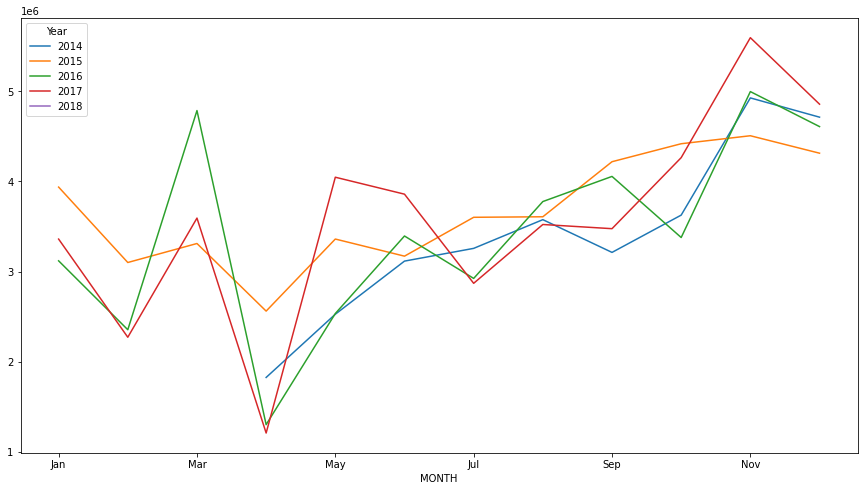

In [58]:
monthly_sales_data.plot() # Plotting the sales yearly

### 2014 - Sales was increasing trend along the year
### 2015 - Sales was best in the year and was mostly constant trend
### 2016 - Sales was up and down until April and there after shows increasing trend
### 2017 - Sales was up and down until April and there after shows increasing trend


In [59]:
data_state = data2.groupby(['Year','STATE'])['Monthly Sales Value'].sum() # Forming groups by year & state wise
data_state.head(10)                                                       # with sum of monthly sales value

Year  STATE           
2014  Haryana              5240665.90
      Himachal Pradesh      197241.09
      Punjab               7693163.00
      Uttar Pradesh       16946511.90
      Uttarakhand           706090.25
2015  Haryana              7958816.38
      Himachal Pradesh      306795.75
      Punjab              10597605.17
      Uttar Pradesh       24187140.46
      Uttarakhand          1063228.22
Name: Monthly Sales Value, dtype: float64

In [60]:
df_yearly_sales = pd.DataFrame(data_state) # Creating dataframe for yearly sales for State wise.
df_yearly_sales.head()

Monthly Sales Value
Year STATE                                
2014 Haryana                    5240665.90
     Himachal Pradesh            197241.09
     Punjab                     7693163.00
     Uttar Pradesh             16946511.90
     Uttarakhand                 706090.25

In [61]:
yearly_sales_data = pd.pivot_table(df_yearly_sales,# Creating Pivot table with Year and Month wise of Monthly Sales Value
        values = "Monthly Sales Value",columns = "STATE", index = "Year")
yearly_sales_data           # Display the table

STATE     Haryana  Himachal Pradesh       Punjab  Uttar Pradesh  Uttarakhand
Year                                                                        
2014   5240665.90         197241.09   7693163.00    16946511.90    706090.25
2015   7958816.38         306795.75  10597605.17    24187140.46   1063228.22
2016   6945277.39         265157.43   9839592.78    22913530.98   1271737.10
2017   7328802.47         308553.18  10025729.32    24242368.35   1021403.29
2018    530951.49          31884.98    476054.16     2038101.01     89631.90

<AxesSubplot:xlabel='Year'>

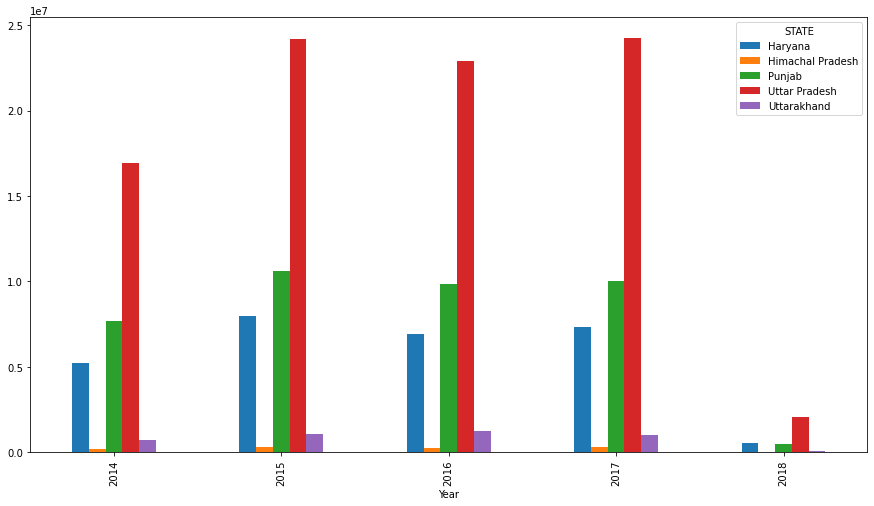

In [62]:
yearly_sales_data.plot(kind = 'bar') # Plotting side by side bar graph for each state with Yearly sales.

### Sales of UP is significantly higher when compared to other states, followed Punjab & Haryana,
### Uttarakhand and Himachal Pradesh has very least sales

## Feature Engineering and selection

In [63]:
# Changing the month names into numbers accordingly
data2["MONTH"].replace({"Jan": '1', "Feb": '2', "Mar": '3', "Apr" : '4',"May": '5',"Jun": '6',
                      "Jul": '7', "Aug": '8', "Sep": '9', "Oct": '10', "Nov": '11', "Dec": '12'}, inplace=True)

In [64]:
data2["MONTH"]= data2["MONTH"].astype(str) # Converting Month column values into string type.

In [65]:
data2['Date'] = data2['Year'] + "-" + data2['MONTH'] # Concatenate Year and MONTH columns.

In [66]:
data2.tail() # Displays the first 5 rows of the data2 Dataframe

Year MONTH        STATE COMPANY  Monthly Sales Value    Date
2730  2017     8  Uttarakhand  zooloo              7565.67  2017-8
2731  2017     7  Uttarakhand  zooloo              5004.45  2017-7
2732  2017     6  Uttarakhand  zooloo              7067.52  2017-6
2733  2017     5  Uttarakhand  zooloo              7798.68  2017-5
2734  2017     9  Uttarakhand  zooloo              1548.72  2017-9

In [67]:
data2['Date'] = pd.to_datetime(data2['Date'],format="%Y-%m") # Change the format of Date column values into 
data2['Date']                                                # Date format

0      2014-04-01
1      2014-08-01
2      2014-12-01
3      2015-02-01
4      2015-01-01
5      2014-07-01
6      2014-06-01
7      2015-03-01
8      2014-05-01
9      2014-11-01
10     2014-10-01
11     2014-09-01
12     2015-04-01
13     2015-08-01
14     2015-12-01
15     2016-02-01
16     2016-01-01
17     2015-07-01
18     2015-06-01
19     2016-03-01
20     2015-05-01
21     2015-11-01
22     2015-10-01
23     2015-09-01
24     2016-04-01
25     2016-08-01
26     2016-12-01
27     2017-02-01
28     2017-01-01
29     2016-07-01
30     2016-06-01
31     2017-03-01
32     2016-05-01
33     2016-11-01
34     2016-10-01
35     2016-09-01
36     2017-04-01
37     2017-08-01
38     2017-12-01
39     2018-01-01
40     2017-07-01
41     2017-06-01
42     2017-05-01
43     2017-11-01
44     2017-10-01
45     2017-09-01
46     2014-12-01
47     2015-02-01
48     2015-01-01
49     2015-03-01
50     2014-11-01
51     2014-10-01
52     2015-04-01
53     2015-08-01
54     2015-12-01
55     201

In [68]:
data2.head() # Displays the first 5 rows to check after changes made in the dataframe columns.

Year MONTH    STATE            COMPANY  Monthly Sales Value       Date
0  2014     4  Haryana  ABC Manufacturing             32577.66 2014-04-01
1  2014     8  Haryana  ABC Manufacturing            107146.53 2014-08-01
2  2014    12  Haryana  ABC Manufacturing            127656.94 2014-12-01
3  2015     2  Haryana  ABC Manufacturing            107427.06 2015-02-01
4  2015     1  Haryana  ABC Manufacturing            128078.82 2015-01-01

In [69]:
data2 = data2.drop(['Year','MONTH'], axis = 1) # Drop the columns Year & Month as we have Date column in Date Format

In [70]:
df = data2.copy()

In [71]:
data2.set_index('Date', inplace = True) # Set the Date as the Index of the Dataframe

In [72]:
data2.head() # Displays the first 5 rows of the data2

STATE            COMPANY  Monthly Sales Value
Date                                                       
2014-04-01  Haryana  ABC Manufacturing             32577.66
2014-08-01  Haryana  ABC Manufacturing            107146.53
2014-12-01  Haryana  ABC Manufacturing            127656.94
2015-02-01  Haryana  ABC Manufacturing            107427.06
2015-01-01  Haryana  ABC Manufacturing            128078.82

In [73]:
# Creating Data frame for each state and sort it by Date
UttarPradesh = data2[data2['STATE']=='Uttar Pradesh'].sort_values(by = 'Date')
Haryana = data2[data2['STATE']=='Haryana'].sort_values(by = 'Date')
HimachalPradesh = data2[data2['STATE']=='Himachal Pradesh'].sort_values(by = 'Date')
Punjab = data2[data2['STATE']=='Punjab'].sort_values(by = 'Date')
Uttarakhand = data2[data2['STATE']=='Uttarakhand'].sort_values(by = 'Date')

In [74]:
UttarPradesh.head(20) # Displays the first 5 rows of the Uttar Pradesh

STATE            COMPANY  Monthly Sales Value
Date                                                             
2014-04-01  Uttar Pradesh  ABC Manufacturing            142695.00
2014-04-01  Uttar Pradesh              unimm              7143.93
2014-04-01  Uttar Pradesh           exicious             96911.24
2014-04-01  Uttar Pradesh             flimbo              4085.10
2014-04-01  Uttar Pradesh               janu             78202.67
2014-04-01  Uttar Pradesh            venible             22856.04
2014-04-01  Uttar Pradesh             monous            109592.86
2014-04-01  Uttar Pradesh          interosis             13557.64
2014-04-01  Uttar Pradesh              trita            113894.92
2014-04-01  Uttar Pradesh              agizu              1731.92
2014-04-01  Uttar Pradesh             cynoid             79725.74
2014-04-01  Uttar Pradesh              unent             66015.00
2014-04-01  Uttar Pradesh             hemify              3802.00
2014-04-01  Uttar Pradesh          disescent              1264.14
2014-04-01  Uttar Pradesh           idiombee             33592.86
2014-04-01  Uttar Pradesh           socimbee               588.33
2014-05-01  Uttar Pradesh              unent             90808.29
2014-05-01  Uttar Pradesh           socimbee              4456.89
2014-05-01  Uttar Pradesh          interosis             12479.94
2014-05-01  Uttar Pradesh           idiombee            114328.12

In [75]:
# Grouping by Monthly Sales Value with Date but all companies.
# This is a Series object.
data_UttarPradesh = UttarPradesh.groupby('Date')['Monthly Sales Value'].sum() 
data_Haryana  = Haryana.groupby('Date')['Monthly Sales Value'].sum()
data_HimachalPradesh = HimachalPradesh.groupby('Date')['Monthly Sales Value'].sum()
data_Punjab = Punjab.groupby('Date')['Monthly Sales Value'].sum()
data_Uttarakhand = Uttarakhand.groupby('Date')['Monthly Sales Value'].sum()


In [76]:
data_UttarPradesh.head()

Date
2014-04-01     775659.39
2014-05-01    1287090.12
2014-06-01    1448486.41
2014-07-01    1764072.41
2014-08-01    2254020.62
Name: Monthly Sales Value, dtype: float64

In [77]:
# Converting into DataFrame

UttarPradesh_sales = pd.DataFrame(data_UttarPradesh)
Haryana_sales = pd.DataFrame(data_Haryana)
HimachalPradesh_sales = pd.DataFrame(data_HimachalPradesh)
Punjab_sales = pd.DataFrame(data_Punjab)
Uttarakhand_sales = pd.DataFrame(data_Uttarakhand)

In [78]:
# Giving columns name for each Data Frame

UttarPradesh_sales.columns.name = 'Uttar Pradesh'
Haryana_sales.columns.name = 'Haryana'
HimachalPradesh_sales.columns.name = 'Himachal Pradesh'
Punjab_sales.columns.name = 'Punjab'
Uttarakhand_sales.columns.name = 'Uttarakhand'

In [79]:
UttarPradesh_sales.head()

Uttar Pradesh  Monthly Sales Value
Date                              
2014-04-01               775659.39
2014-05-01              1287090.12
2014-06-01              1448486.41
2014-07-01              1764072.41
2014-08-01              2254020.62

## Data Visualization

## User defined function for plotting Total Pesticides sales for each state

In [80]:
def statewise_sales(S):
    
    fig, ax = plt.subplots(figsize = (15, 6))
    
    # Plot the Sales 
    ax.plot(S, color = 'r', marker = 'o')
    
    # Set the title, xlabel, ylabel
    ax.set(title = f'{S.columns.name} Statewise Sales trend', xlabel = 'Date',
       ylabel = 'Monthly Sales Value')


    #defines the tick location 
    ax.xaxis.set_major_locator(MonthLocator())

    #defines the label format for x axis
    ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
    ax.tick_params(axis="x", labelrotation= 45)
    ax.tick_params(axis='both', which='both', labelsize=13)
    
    #defines the label format for y- axis
    ax.tick_params('y', colors='green')  

    # Save the plot in .png format
    # plt.savefig(f"{S.columns.name} State Pesticides Sales Trend for all Companies.png", bbox_inches='tight',pad_inches = 1, papertype = 'letter', orientation ='landscape', dpi=200)

    plt.show()



## Uttar Pradesh Pesticides sales trend during 2014 - 2018 for all companies

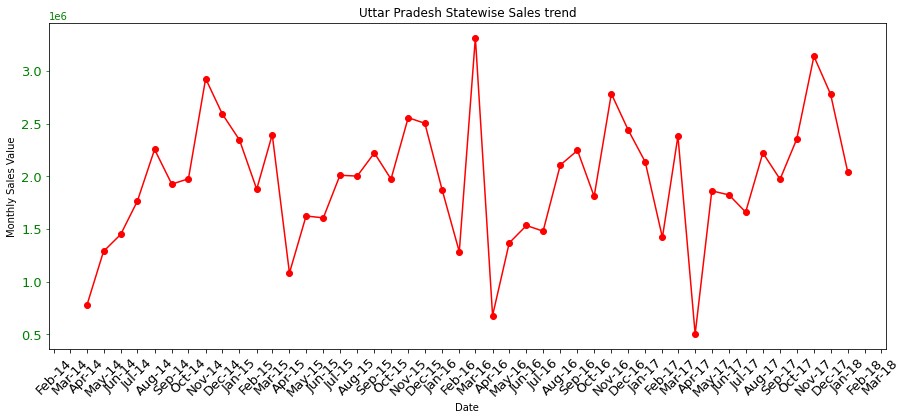

In [81]:
statewise_sales(UttarPradesh_sales)

## Punjab Pesticides sales trend during 2014 - 2018 for all companies

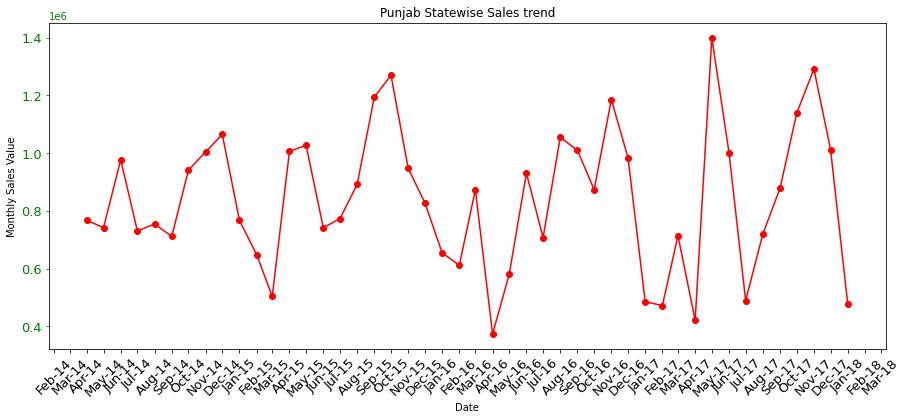

In [82]:
statewise_sales(Punjab_sales)

## Haryana Pesticides sales trend during 2014 - 2018 for all companies

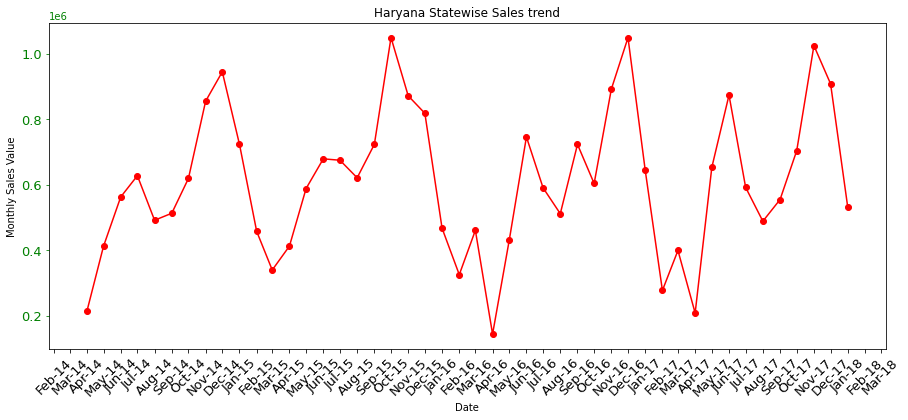

In [83]:
statewise_sales(Haryana_sales)

## Himachal Pradesh Pesticides sales trend during 2014 - 2018 for all companies

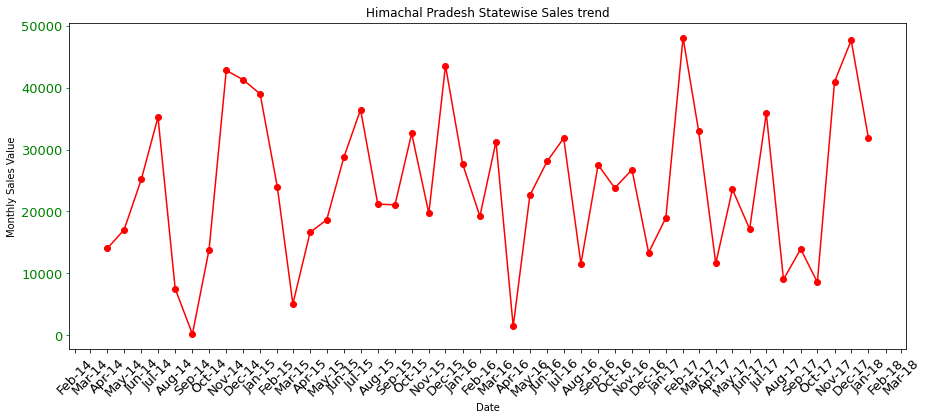

In [84]:
statewise_sales(HimachalPradesh_sales)

## Uttarakhand Pesticides sales trend during 2014 - 2018 for all companies

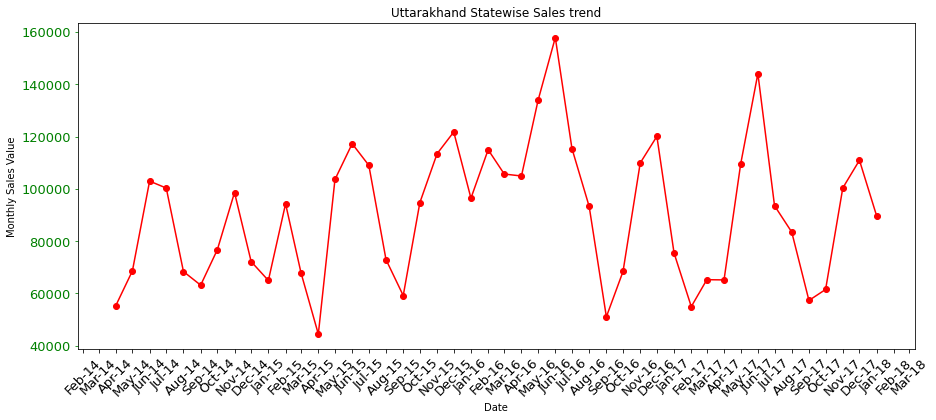

In [85]:
statewise_sales(Uttarakhand_sales)

# Importing Rainfall data

In [86]:
rainfall = pd.read_excel('rainfall_updated.xlsx')

## Data Preprocessing

In [87]:
rainfall.head()

Date  Haryana Rainfall(mm)\n\n  Himachal Pradesh Rainfall(mm)\n  \
0  2014-04                       7.5                             60.6   
1  2014-05                      20.3                             68.9   
2  2014-06                      25.9                             51.7   
3  2014-07                      72.3                            203.6   
4  2014-08                      34.8                            146.7   

   Punjab Rainfall(mm)\n\n  UP Rainfall(mm)\n\n  Uttarakhand Rainfall(mm)\n\n  
0                     24.5                  7.0                          37.6  
1                     20.8                 21.7                          52.9  
2                     20.6                 69.8                          62.9  
3                     76.3                376.1                         462.7  
4                     41.9                219.1                         264.2

In [88]:
rainfall.shape

(46, 6)

In [89]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            46 non-null     object 
 1   Haryana Rainfall(mm)

          46 non-null     float64
 2   Himachal Pradesh Rainfall(mm)
  46 non-null     float64
 3   Punjab Rainfall(mm)

           46 non-null     float64
 4   UP Rainfall(mm)

               46 non-null     float64
 5   Uttarakhand Rainfall(mm)

      46 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.3+ KB


## Feature Engineering and Selection

In [90]:
rainfall['Date'] = pd.to_datetime(rainfall['Date'],format="%Y-%m")
rainfall['Date'].head()

0   2014-04-01
1   2014-05-01
2   2014-06-01
3   2014-07-01
4   2014-08-01
Name: Date, dtype: datetime64[ns]

In [91]:
rainfall.head()

Date  Haryana Rainfall(mm)\n\n  Himachal Pradesh Rainfall(mm)\n  \
0 2014-04-01                       7.5                             60.6   
1 2014-05-01                      20.3                             68.9   
2 2014-06-01                      25.9                             51.7   
3 2014-07-01                      72.3                            203.6   
4 2014-08-01                      34.8                            146.7   

   Punjab Rainfall(mm)\n\n  UP Rainfall(mm)\n\n  Uttarakhand Rainfall(mm)\n\n  
0                     24.5                  7.0                          37.6  
1                     20.8                 21.7                          52.9  
2                     20.6                 69.8                          62.9  
3                     76.3                376.1                         462.7  
4                     41.9                219.1                         264.2

In [92]:
rainfall.set_index('Date', inplace = True)

In [93]:
rainfall= rainfall.sort_values(by = 'Date')

In [94]:
rainfall.head()

Haryana Rainfall(mm)\n\n  Himachal Pradesh Rainfall(mm)\n  \
Date                                                                    
2014-04-01                       7.5                             60.6   
2014-05-01                      20.3                             68.9   
2014-06-01                      25.9                             51.7   
2014-07-01                      72.3                            203.6   
2014-08-01                      34.8                            146.7   

            Punjab Rainfall(mm)\n\n  UP Rainfall(mm)\n\n  \
Date                                                       
2014-04-01                     24.5                  7.0   
2014-05-01                     20.8                 21.7   
2014-06-01                     20.6                 69.8   
2014-07-01                     76.3                376.1   
2014-08-01                     41.9                219.1   

            Uttarakhand Rainfall(mm)\n\n  
Date                                      
2014-04-01                          37.6  
2014-05-01                          52.9  
2014-06-01                          62.9  
2014-07-01                         462.7  
2014-08-01                         264.2

## Data Visualization

<AxesSubplot:>

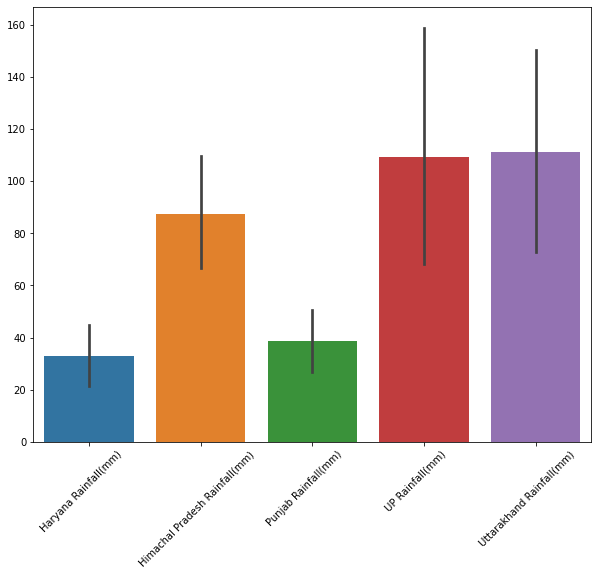

In [95]:
plt.figure(figsize = (10,8))
plt.xticks(rotation = 45)
sns.barplot(data = rainfall)

### Uttarakhand and UttarPradesh has the highest rainfall, but sales in UP is highest and Uttarakhand also lowest

In [96]:
rainfall_Haryana = rainfall[['Haryana Rainfall(mm)\n\n']] # Creating only Haryana Rainfall Dataframe
rainfall_Haryana.columns.name = 'Haryana'                 # Giving columns name

rainfall_HimachalPradesh = rainfall[['Himachal Pradesh Rainfall(mm)\n']]# Creating only HP Rainfall Dataframe
rainfall_HimachalPradesh.columns.name = 'HimachalPradesh' # Giving columns name

rainfall_Punjab = rainfall[['Punjab Rainfall(mm)\n\n']]   # Creating only Punjab Rainfall Dataframe
rainfall_Punjab.columns.name = 'Punjab'                   # Giving columns name

rainfall_UttarPradesh = rainfall[['UP Rainfall(mm)\n\n']] # Creating only Uttar Pradesh Rainfall Dataframe
rainfall_UttarPradesh.columns.name = 'UttarPradesh'       # Giving columns name

rainfall_Uttarakhand = rainfall[['Uttarakhand Rainfall(mm)\n\n']] # Creating only Uttarakhand Rainfall Dataframe
rainfall_Uttarakhand.columns.name = 'Uttarakhand'         # Giving columns name

In [97]:
rainfall_UttarPradesh.head()

UttarPradesh  UP Rainfall(mm)\n\n
Date                             
2014-04-01                    7.0
2014-05-01                   21.7
2014-06-01                   69.8
2014-07-01                  376.1
2014-08-01                  219.1

## User defined function for plotting Rainfall for each state

In [98]:
def statewise_rainfall(R):
    
    fig, ax = plt.subplots(figsize = (15, 6))
    
    # Plot the Sales 
    ax.plot(R, color = 'm', marker = 'h', ms = 10)
    
    # Set the title, xlabel and Ylable
    ax.set(title = f'{R.columns.name} Rainfall 2014 - 2018', xlabel = 'Date',
       ylabel = 'Uttar Pradesh Rainfall (mm)')

    #defines the tick location 
    ax.xaxis.set_major_locator(MonthLocator())

    #defines the label format
    ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
    ax.tick_params(axis="x", labelrotation= 45)
    ax.tick_params(axis='both', which='both', labelsize=12)
    
    #defines the label format for y- axis
    ax.tick_params('y', colors='blue')  

    # Save the plot in .png format
    # plt.savefig(f"{R.columns.name} Statew Rainfall from 2014-2018.png", bbox_inches='tight',pad_inches = 1, papertype = 'letter',orientation ='landscape', dpi=200)

    plt.show()


## Uttar Pradesh Rainfall trend during 2014 - 2018 

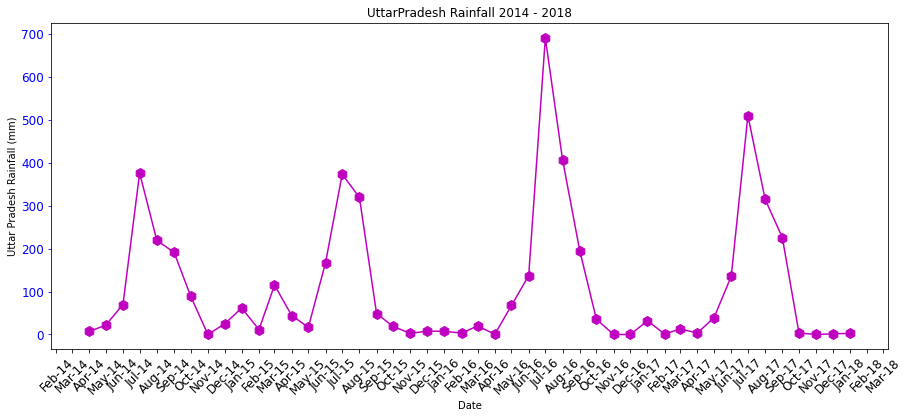

In [99]:
statewise_rainfall(rainfall_UttarPradesh)

## Punjab Rainfall trend during 2014 - 2018

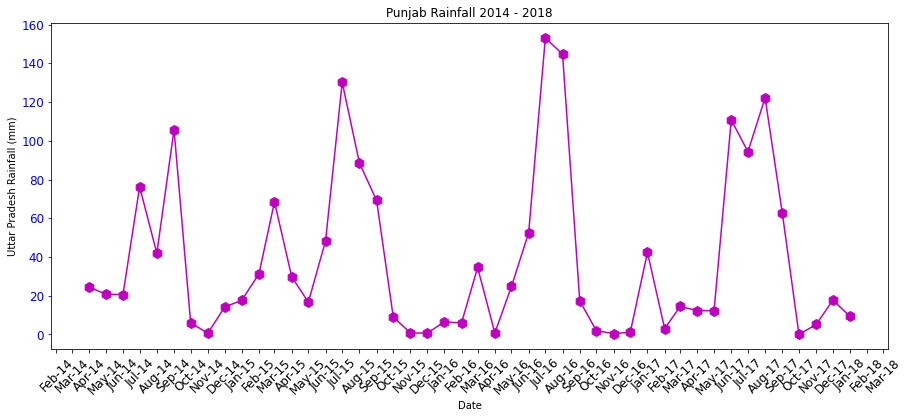

In [100]:
statewise_rainfall(rainfall_Punjab)

## Haryana Rainfall trend during 2014 - 2018

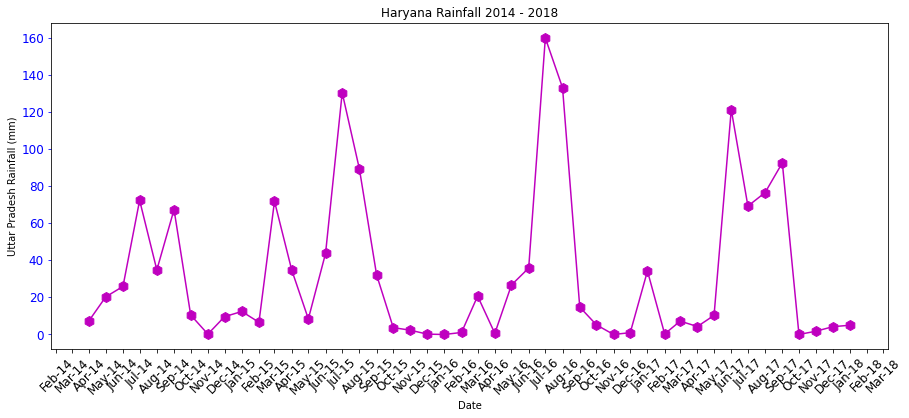

In [101]:
statewise_rainfall(rainfall_Haryana)

## Himachal Pradesh Rainfall trend during 2014 - 2018

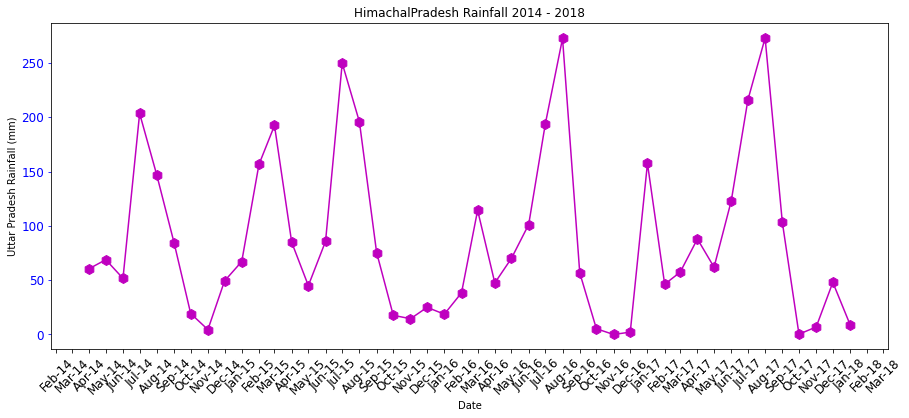

In [102]:
statewise_rainfall(rainfall_HimachalPradesh)

## Uttarakhand Rainfall trend during 2014 - 2018

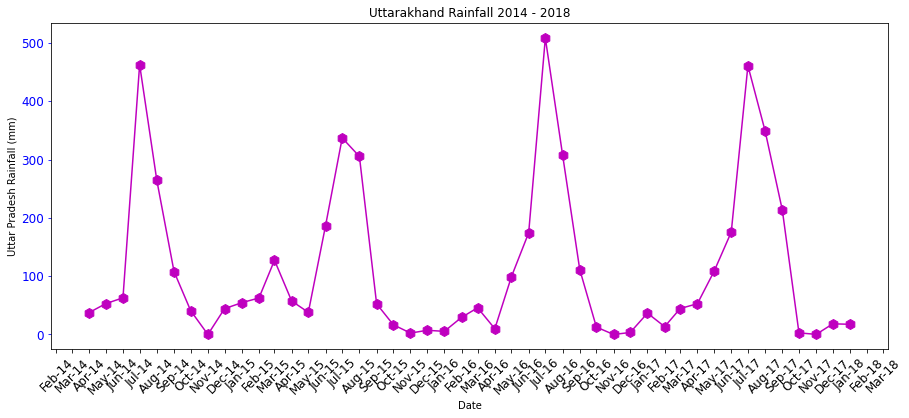

In [103]:
statewise_rainfall(rainfall_Uttarakhand)

# Comparison of Sales and Rainfall data

### Created user defined function for plotting Sales and Rainfall data for each State in one figure

In [104]:
def sales_rainfall_Comparison(s,r):
   
   
    # Create a figure and an axis
    fig, ax1 = plt.subplots(figsize = (15, 6))

    # Plot State sales with a red line
    ax1.plot(s, color = 'darkorange', marker = 'o')

    # Set the title, xlabel and ylabel
    ax1.set(title = f'{s.columns.name} Statewise Sales & Rainfall 2014 - 2018', xlabel = 'Date',
       ylabel = 'Monthly Sales Value')


    #defines the tick location 
    ax1.xaxis.set_major_locator(MonthLocator())

    #defines the label format for x - axis
    ax1.xaxis.set_major_formatter(DateFormatter("%b-%y"))
    ax1.tick_params(axis="x", labelrotation= 45)
    ax1.tick_params(axis='both', which='both', labelsize=13)

    #defines the label format for y- axis
    ax1.tick_params('y', colors='darkorange')     # 'y' because we want to change the y axis

    # Specify we will be using a twin x axis
    ax2 = ax1.twinx()

    # Plot State rainfall with a green line
    ax2.plot(r, color = 'limegreen', marker = 'h', ms = 10)

    # Set the ylabel
    ax2.set(ylabel = f' {r.columns.name} Rainfall (mm)')

    #defines the label format for y- axis
    ax2.tick_params('y', colors='limegreen')

    #defines the tick location 
    ax2.xaxis.set_major_locator(MonthLocator())

    #defines the label format
    ax2.xaxis.set_major_formatter(DateFormatter("%b-%y"))
    ax2.tick_params(axis="x", labelrotation= 45)
    ax2.tick_params(axis='both', which='both', labelsize=12)
    
    ax1.legend(['Sales'], loc = 'upper left')
    ax2.legend(['Rainfall'], loc = 'upper right')
    
    plt.tight_layout()
    plt.show()


## Comparison of Sales & Rainfall in Uttar Pradesh State during 2014 - 2018

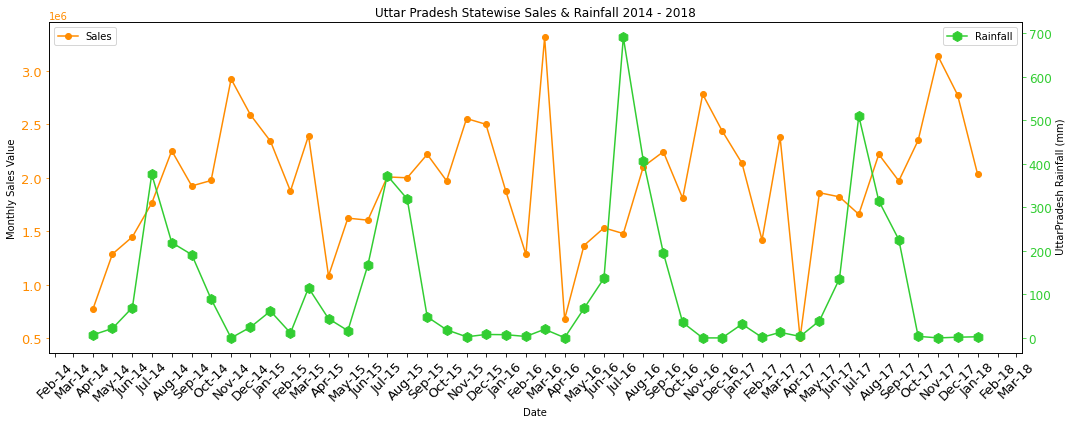

In [105]:
sales_rainfall_Comparison(UttarPradesh_sales,rainfall_UttarPradesh)

## Comparison of Sales & Rainfall in Punjab State during 2014 - 2018

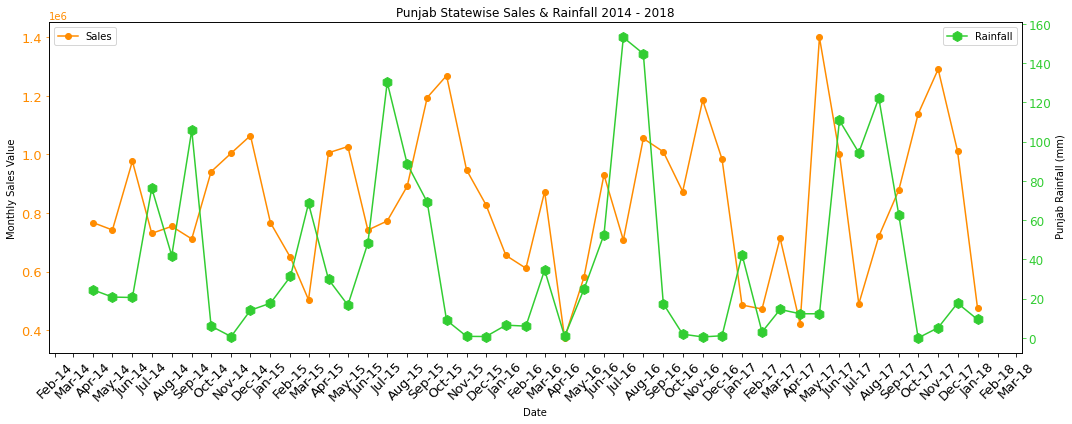

In [106]:
sales_rainfall_Comparison(Punjab_sales,rainfall_Punjab)

## Comparison of Sales & Rainfall in Haryana State during 2014 - 2018

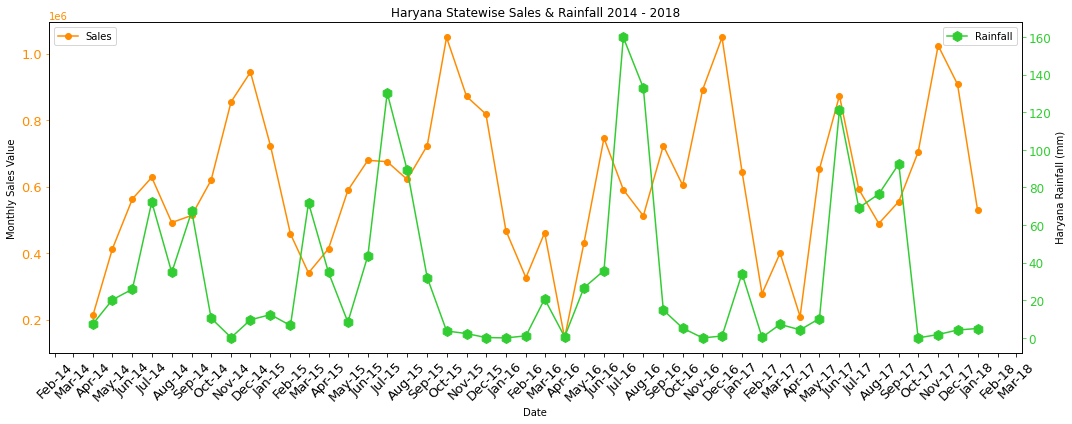

In [107]:
sales_rainfall_Comparison(Haryana_sales,rainfall_Haryana)

## Comparison of Sales & Rainfall in Uttarakhand State during 2014 - 2018

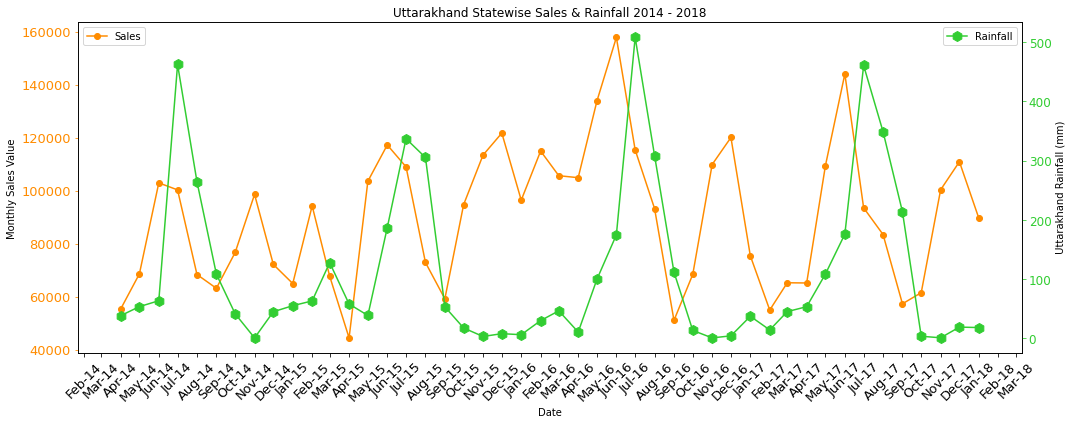

In [108]:
sales_rainfall_Comparison(Uttarakhand_sales,rainfall_Uttarakhand)

## Comparison of Sales & Rainfall in Himachal Pradesh State during 2014 - 2018

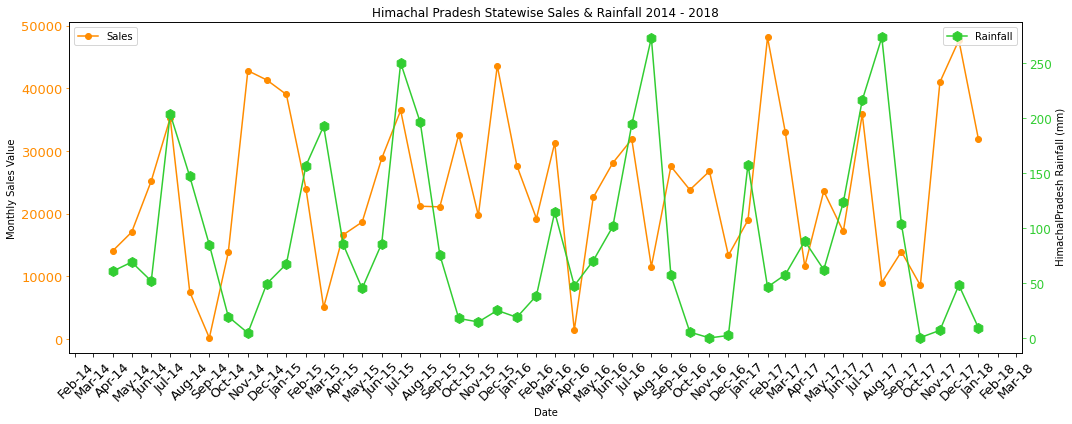

In [109]:
sales_rainfall_Comparison(HimachalPradesh_sales,rainfall_HimachalPradesh)

In [110]:
# Getting sales of ABC Manufacturing company only and creating Data Frame
df_ABCManufacturing = data3[data3['COMPANY'] == 'ABC Manufacturing'] 

In [111]:
df_ABCManufac_data = pd.pivot_table(df_ABCManufacturing, # Creating Pivot table with Year and Month wise of Monthly Sales Value
    values = "Monthly Sales Value",columns = "STATE", index = "Year") # for ABC Manufacturing Company

In [112]:
df_ABCManufac_data # Displays the pivot table of the ABC Manufacturing

STATE        Haryana  Himachal Pradesh         Punjab  Uttar Pradesh  \
Year                                                                   
2014   111445.304444      12515.116667  174498.572222  761989.575556   
2015   151382.239167      14871.477500  204269.399167  836965.586667   
2016   110678.500000      13643.293333  174939.470000  729975.005833   
2017   114397.280000      11885.085833  155117.035000  717401.292500   
2018   145582.240000      15490.440000   93745.890000  734645.700000   

STATE   Uttarakhand  
Year                 
2014   46515.436667  
2015   47325.983333  
2016   47598.962500  
2017   40705.843333  
2018   51922.350000

<AxesSubplot:xlabel='Year'>

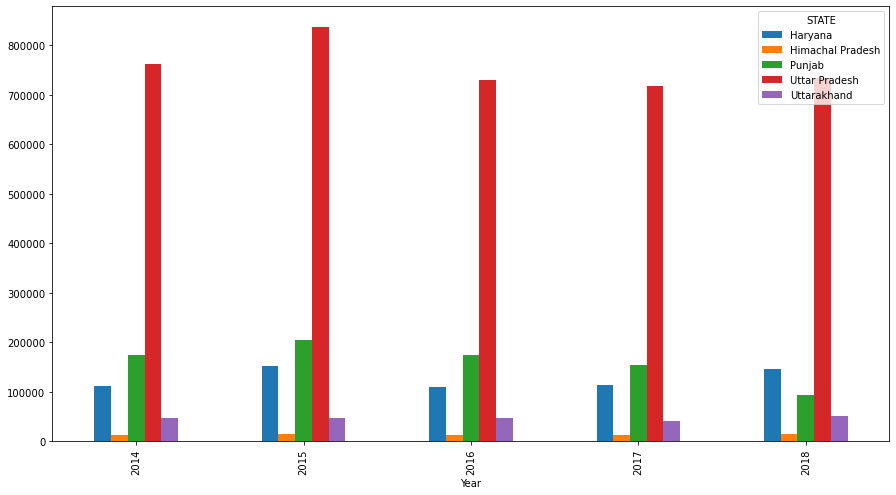

In [113]:
df_ABCManufac_data.plot(kind = 'bar') # Plotting side by side bar graph for each state with Yearly sales of ABC Manufacturing

In [114]:
# Getting sales of ABC Manufacturing company only from each state and creating Data Frame

UttarPradesh_ABC = UttarPradesh[UttarPradesh['COMPANY']=='ABC Manufacturing']
Haryana_ABC = Haryana[Haryana['COMPANY']=='ABC Manufacturing']
HimachalPradesh_ABC = HimachalPradesh[HimachalPradesh['COMPANY']=='ABC Manufacturing']
Punjab_ABC = Punjab[Punjab['COMPANY']=='ABC Manufacturing']
Uttarakhand_ABC = Uttarakhand[Uttarakhand['COMPANY']=='ABC Manufacturing']

In [115]:
Uttarakhand_ABC.head() # Displays the first 5 rows

STATE            COMPANY  Monthly Sales Value
Date                                                           
2014-04-01  Uttarakhand  ABC Manufacturing             33580.71
2014-05-01  Uttarakhand  ABC Manufacturing             34247.07
2014-06-01  Uttarakhand  ABC Manufacturing             57970.22
2014-07-01  Uttarakhand  ABC Manufacturing             65174.90
2014-08-01  Uttarakhand  ABC Manufacturing             35574.53

In [116]:
# Creating Data Frame only with the Date index and Monthly Sales value for each state

UttarPradesh_ABCManufac = UttarPradesh_ABC[['Monthly Sales Value']]
Haryana_ABCManufac = Haryana_ABC[['Monthly Sales Value']]
HimachalPradesh_ABCManufac = HimachalPradesh_ABC[['Monthly Sales Value']]
Punjab_ABCManufac = Punjab_ABC[['Monthly Sales Value']]
Uttarakhand_ABCManufac = Uttarakhand_ABC[['Monthly Sales Value']]

In [117]:
# Giving Columns name

UttarPradesh_ABCManufac.columns.name = 'Uttar Pradesh'
Haryana_ABCManufac.columns.name = 'Haryana'
HimachalPradesh_ABCManufac.columns.name = 'Himachal Pradesh'
Punjab_ABCManufac.columns.name = 'Punjab'
Uttarakhand_ABCManufac.columns.name = 'Uttarakhand'

In [118]:
Uttarakhand_ABCManufac.head()  # Displays the first 5 rows

Uttarakhand  Monthly Sales Value
Date                            
2014-04-01              33580.71
2014-05-01              34247.07
2014-06-01              57970.22
2014-07-01              65174.90
2014-08-01              35574.53

## User defined function for plotting ABC Manufacturing sales for each state

In [119]:
def ABCManufacturing_sales(z):
   
   
    # Create a figure and an axis
    fig, ax = plt.subplots(figsize = (15, 6))

    # Plot State sales with a crayon line
    ax.plot(z, color = 'blueviolet', marker = '*', ms = 10)

    # Set the title, xlabel and ylabel
    ax.set(title = f'{z.columns.name} ABC Manufacturing Sales trend 2014 - 2018', xlabel = 'Date',
       ylabel = 'Monthly Sales Value')


    #defines the tick location 
    ax.xaxis.set_major_locator(MonthLocator())

    #defines the label format for x - axis
    ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
    ax.tick_params(axis="x", labelrotation= 45)
    ax.tick_params(axis='both', which='both', labelsize=13)

    #defines the label format for y- axis
    ax.tick_params('y', colors='blueviolet')     # 'y' because we want to change the y axis

    # Save the plot in .png format
    # plt.savefig(f"{z.columns.name} ABC Manufacturing State sales from 2014-2018.png", bbox_inches='tight',pad_inches = 1, papertype = 'letter',orientation ='landscape', dpi=200)
    plt.tight_layout()
    plt.show()


## Uttar Pradesh ABC Manufacturing Pesticides sales trend during 2014 - 2018

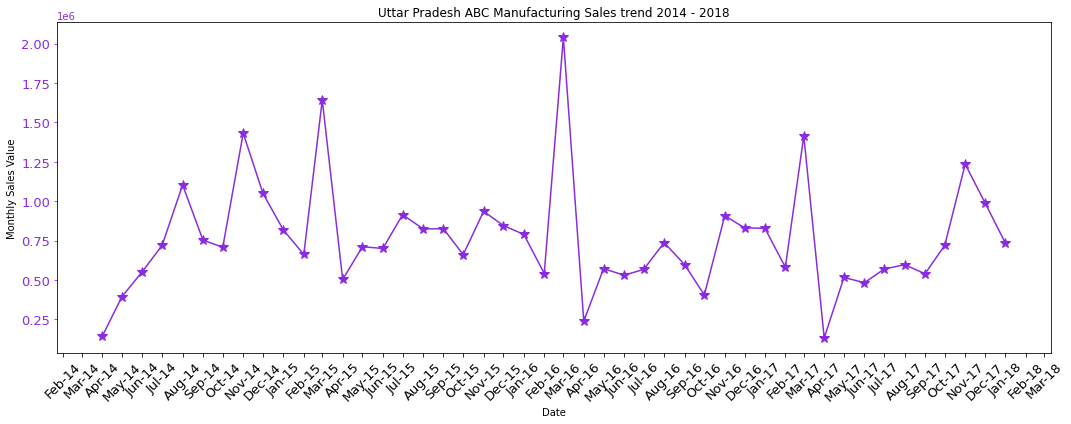

In [120]:
ABCManufacturing_sales(UttarPradesh_ABCManufac)

## Punjab ABC Manufacturing Pesticides sales trend during 2014 - 2018

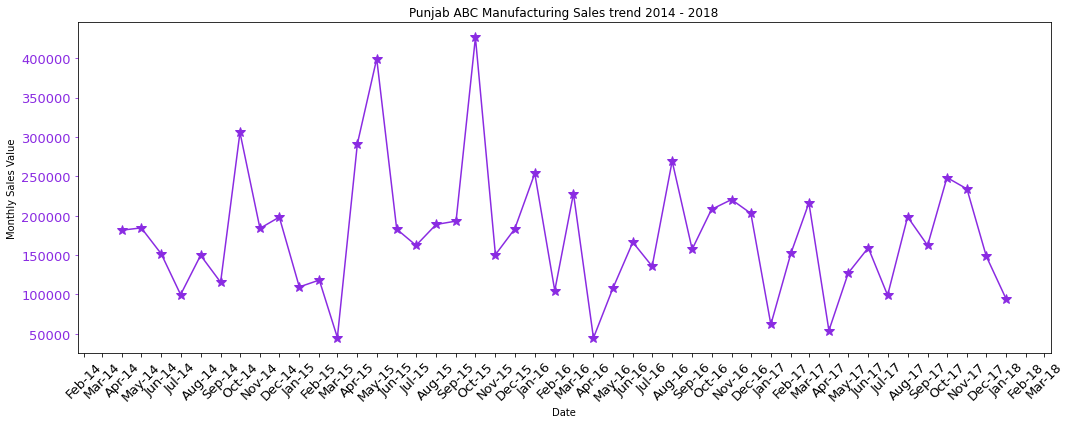

In [121]:
ABCManufacturing_sales(Punjab_ABCManufac)

## Haryana ABC Manufacturing Pesticides sales trend during 2014 - 2018

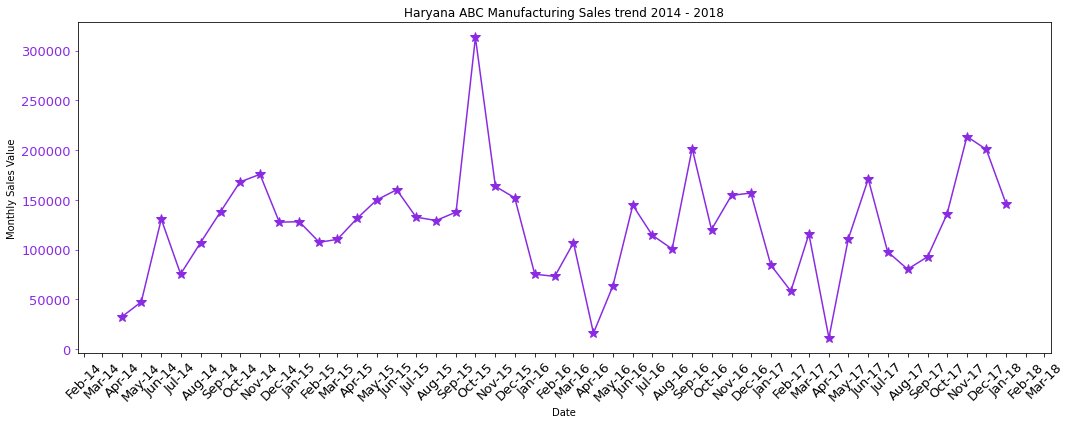

In [122]:
ABCManufacturing_sales(Haryana_ABCManufac)

## Himachal Pradesh ABC Manufacturing Pesticides sales trend during 2014 - 2018

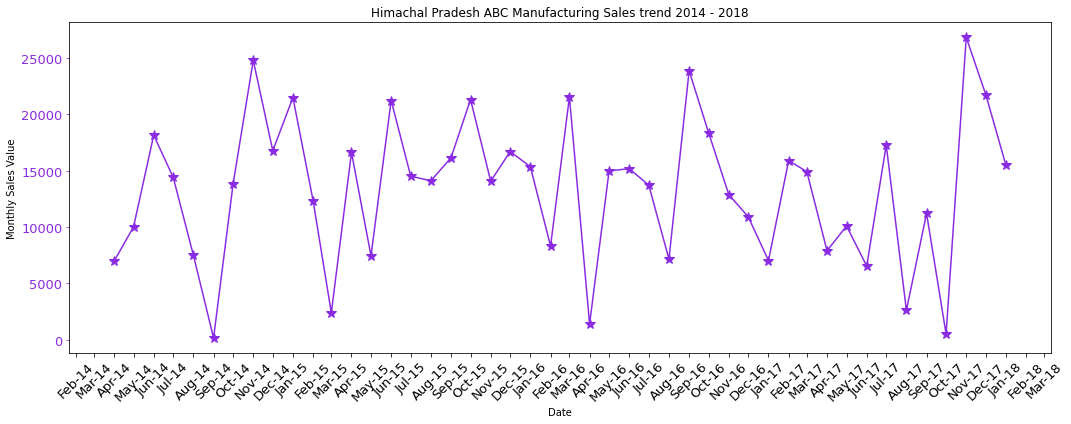

In [123]:
ABCManufacturing_sales(HimachalPradesh_ABCManufac)

## Uttarakhand ABC Manufacturing Pesticides sales trend during 2014 - 2018

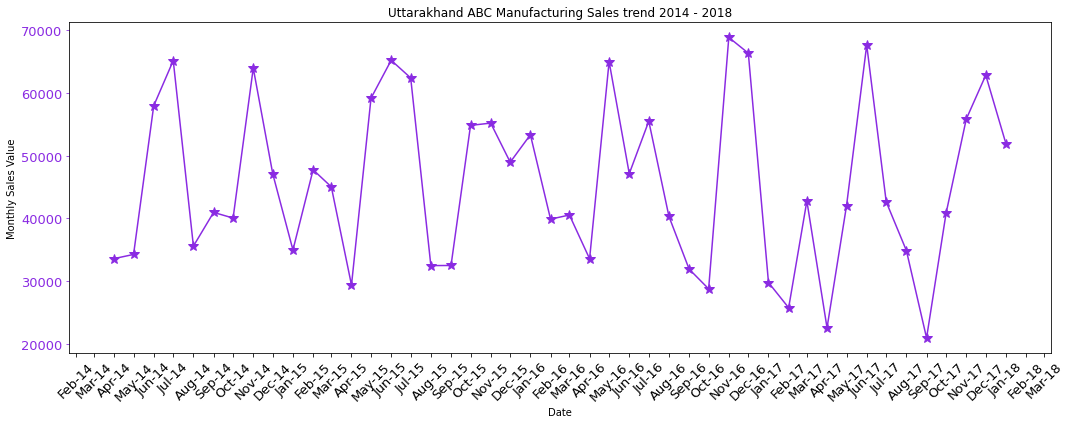

In [124]:
ABCManufacturing_sales(Uttarakhand_ABCManufac)

All these data for ABC Manufacturing for the 5 states is showing some patterns in the above plots.

In this model we are comparing the Sales with the time(that is successive sequence of regular time intervals).
So we are going to use the Time Series Model.

We need to check our data using Decomposition method.
Decomposition allows us to decompose the time series data into three distinct components.
1. Trend
2. Sesonality
3. Residual (Irregular)

This is a Additive Time Series, as we have a constant level plot, i.e Trend + Seasonality + Residuals(Irregularities).

### Uttar Pradesh ABC Manufacturing Decomposition of Time Series Data

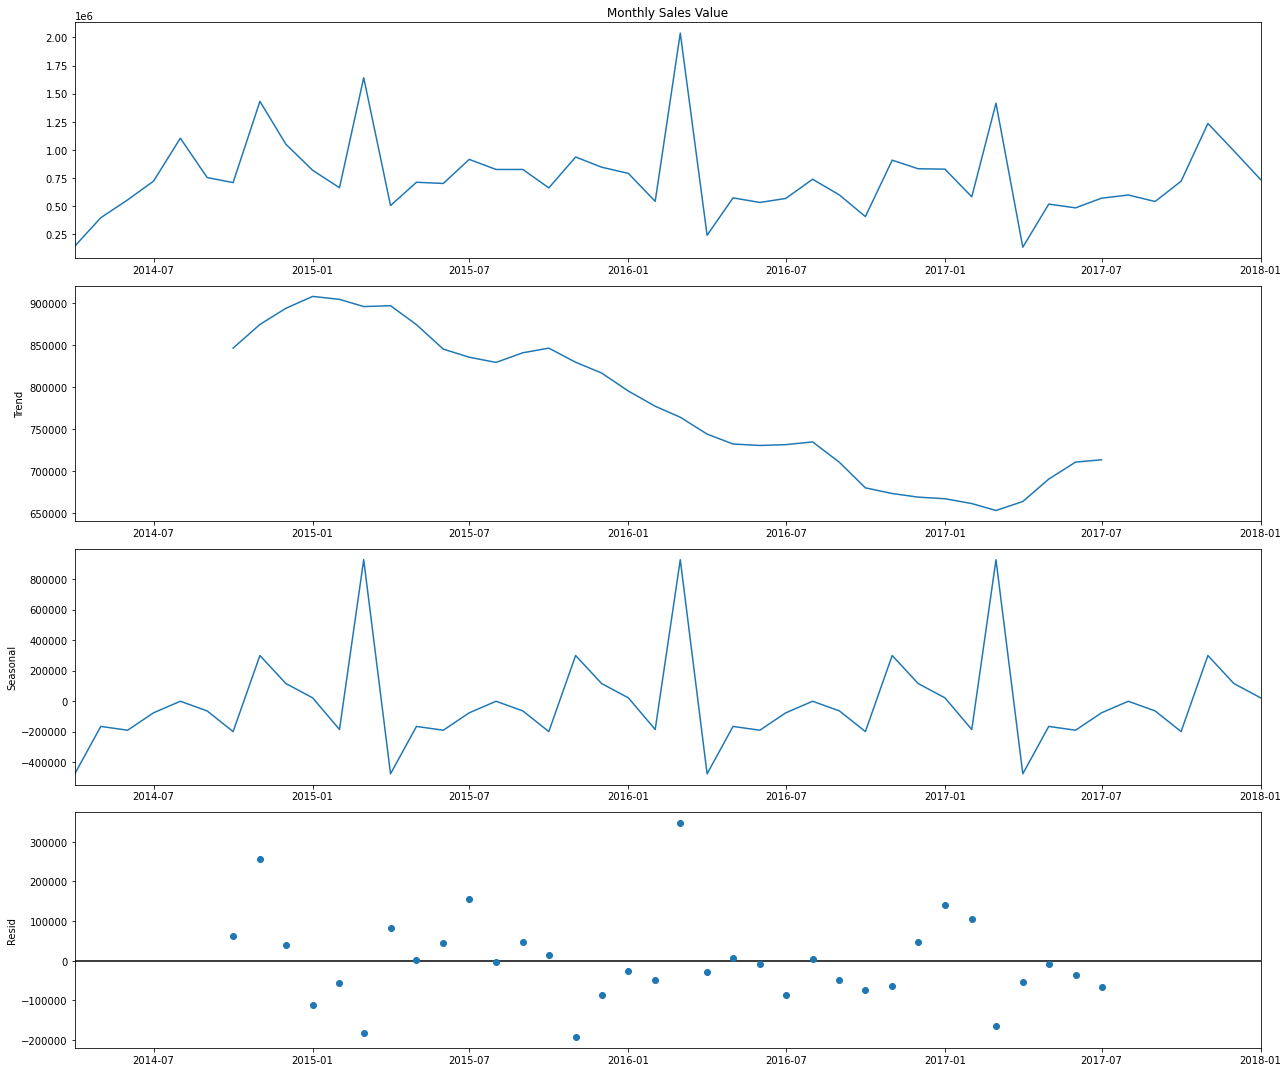

In [125]:
rcParams['figure.figsize'] = 18, 15
decomposition = sm.tsa.seasonal_decompose(UttarPradesh_ABCManufac['Monthly Sales Value'], model = 'additive')
fig = decomposition.plot()

plt.show()

### Punjab ABC Manufacturing Decomposition of Time Series Data

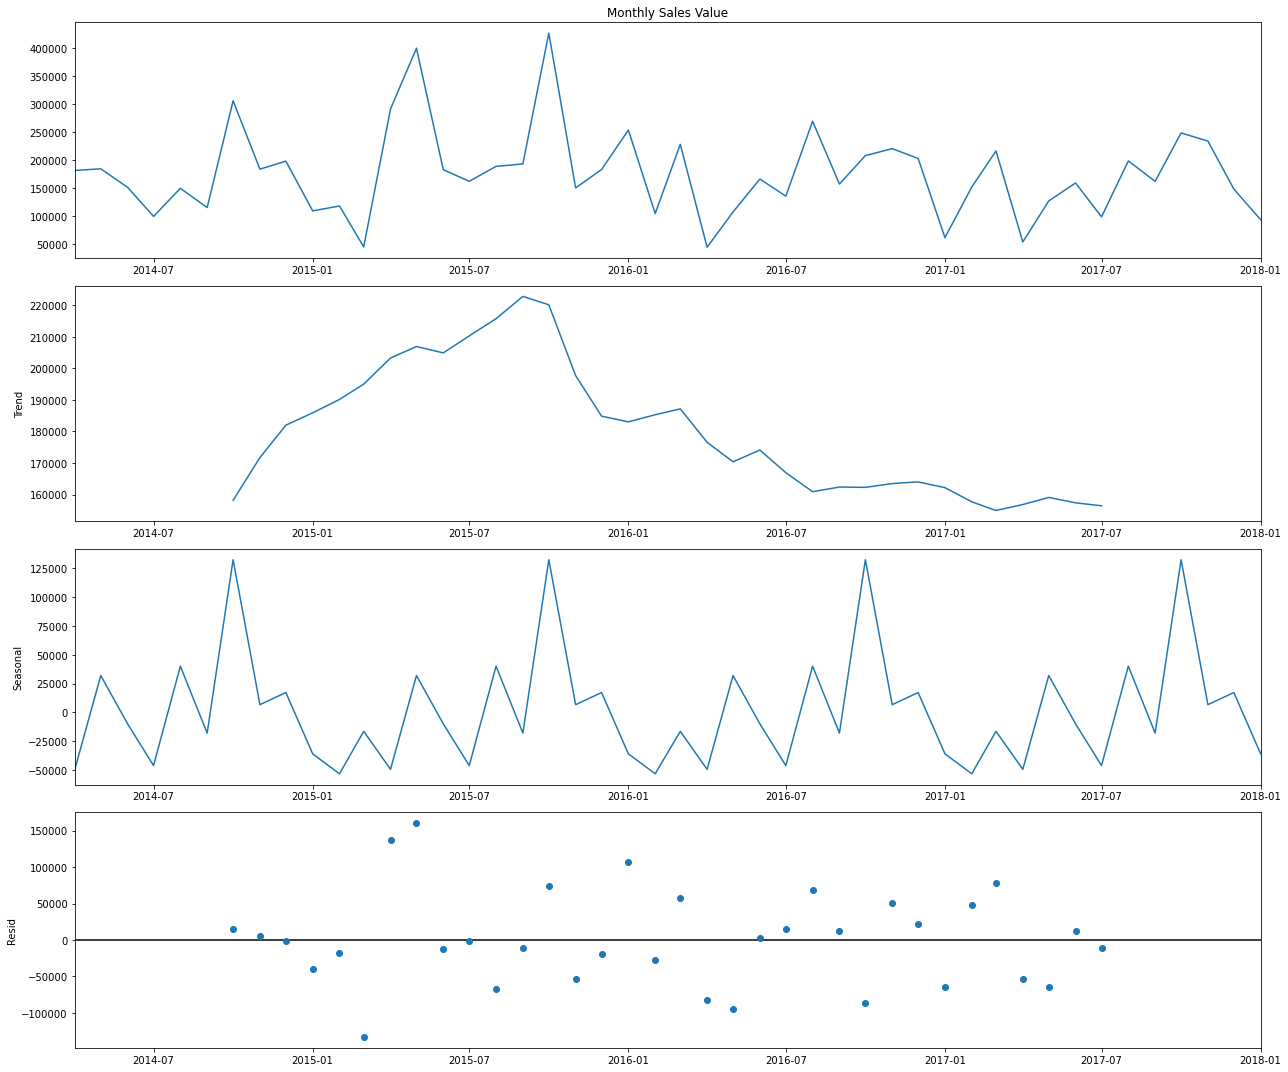

In [126]:
rcParams['figure.figsize'] = 18, 15
decomposition = sm.tsa.seasonal_decompose(Punjab_ABC['Monthly Sales Value'], model = 'additive')
fig = decomposition.plot()
plt.show()

### Haryana ABC Manufacturing Decomposition of Time Series Data

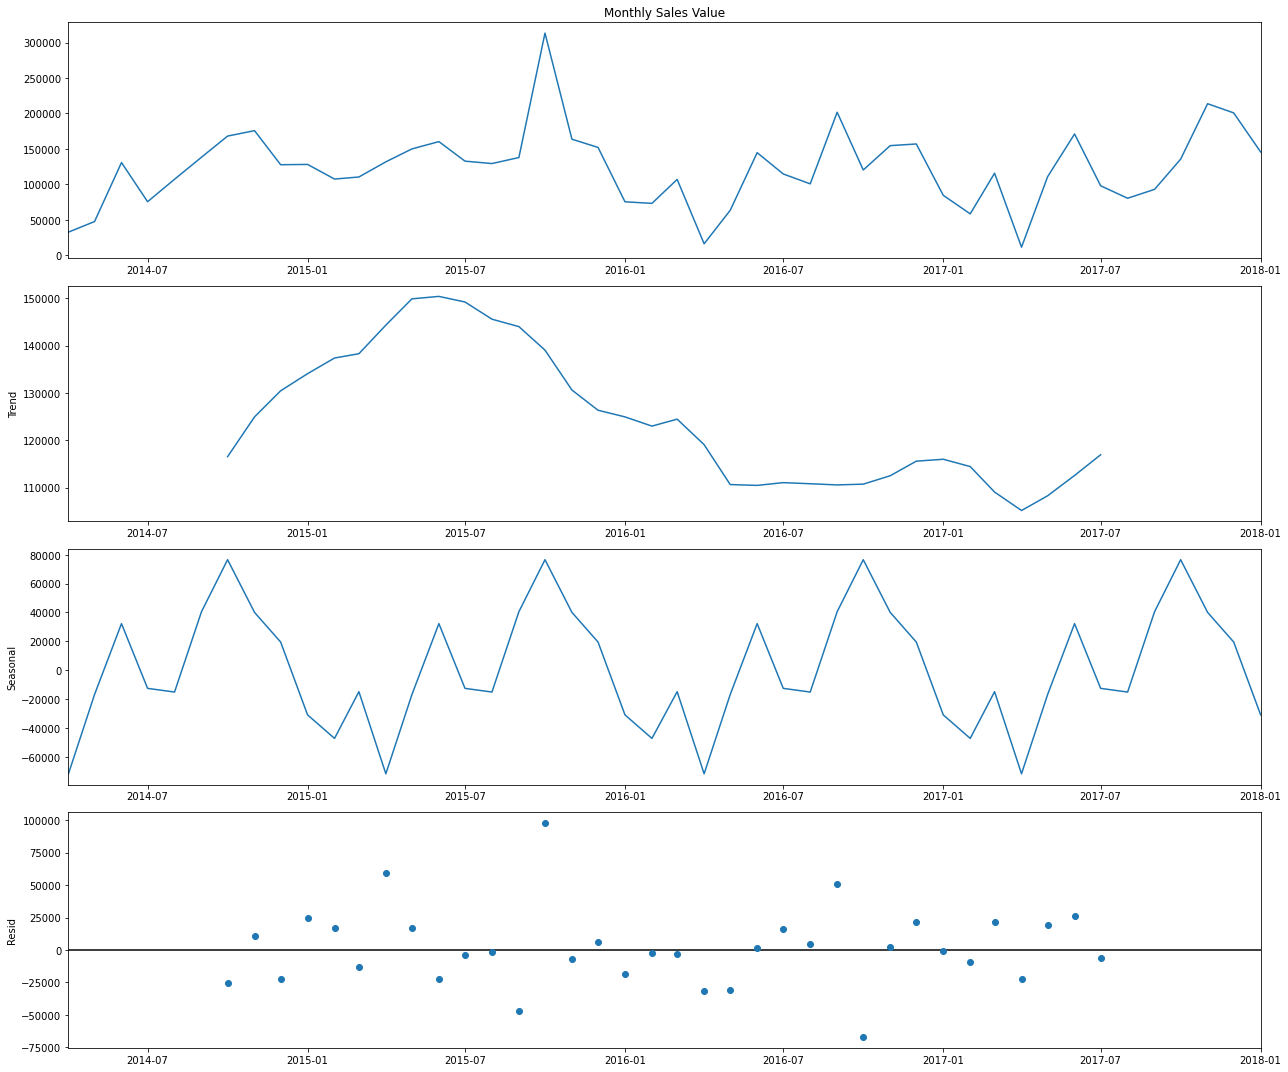

In [127]:
rcParams['figure.figsize'] = 18, 15
decomposition = sm.tsa.seasonal_decompose(Haryana_ABCManufac['Monthly Sales Value'], model = 'additive')
fig = decomposition.plot()
plt.show()

### Uttarakhand ABC Manufacturing Decomposition of Time Series Data

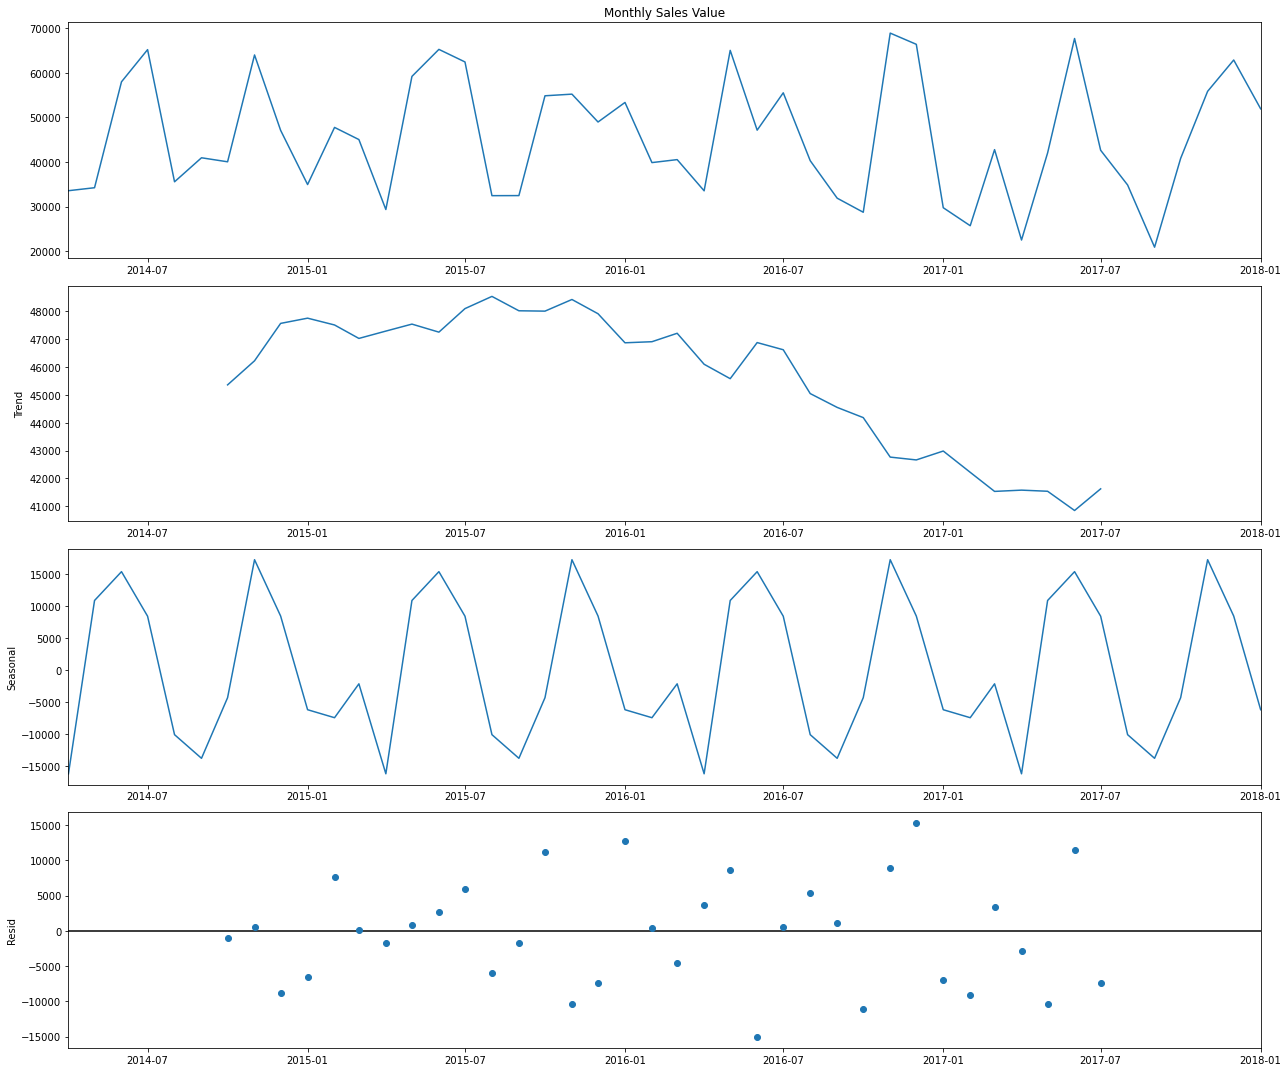

In [128]:
rcParams['figure.figsize'] = 18, 15
decomposition = sm.tsa.seasonal_decompose(Uttarakhand_ABC['Monthly Sales Value'], model = 'additive')
fig = decomposition.plot()
plt.show()

### Himachal Pradesh ABC Manufacturing Decomposition of Time Series Data

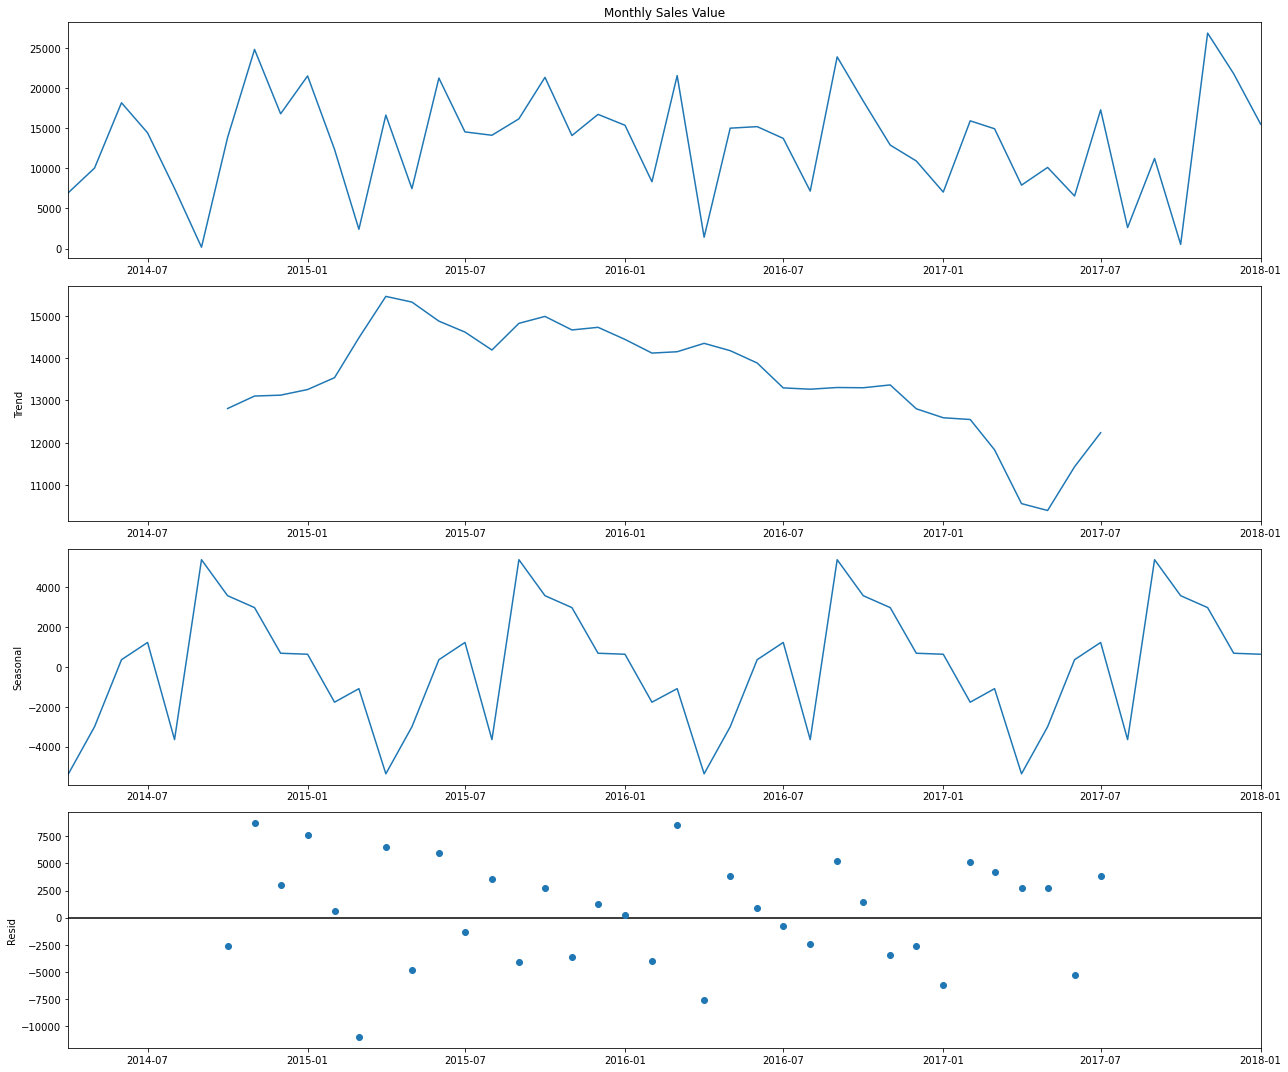

In [129]:
rcParams['figure.figsize'] = 18, 15
decomposition = sm.tsa.seasonal_decompose(HimachalPradesh_ABC['Monthly Sales Value'], model = 'additive')
fig = decomposition.plot()
plt.show()

The plots above shows that the sales have some trend and seasonality for ABC Manufacturing company in each state.

In [130]:
# Determining rolling statistics - Moving Average Method:  moving average model to smooth our time series.

def moving_average(x, window):
    
    rolling_mean = x.rolling(window = window).mean()
    rolling_std = x.rolling(window = window).std()    
    print(rolling_mean, rolling_std)
    
    # Plotting the Rolling Statistics
    orig = plt.plot(x, color ='blue',label = 'Original')
    mean = plt.plot(rolling_mean, color ='red',label = 'Rolling mean')
    std = plt.plot(rolling_std, color ='black',label = 'Rolling std')
    plt.legend(loc = 'best')
    plt.title(f'Moving average \n Rolling Mean & Std Deviation \n window size = {window}')
    plt.show()

In [131]:
# Testing for Stationary using ADCF Test

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

# UttarPradesh Pesticide Sales Forecast with different models

Uttar Pradesh  Monthly Sales Value
Date                              
2014-04-01                     NaN
2014-05-01                     NaN
2014-06-01                     NaN
2014-07-01                     NaN
2014-08-01                     NaN
2014-09-01                     NaN
2014-10-01                     NaN
2014-11-01                     NaN
2014-12-01                     NaN
2015-01-01                     NaN
2015-02-01                     NaN
2015-03-01           831631.579167
2015-04-01           861712.459167
2015-05-01           888048.090833
2015-06-01           900260.775833
2015-07-01           916405.313333
2015-08-01           893203.954167
2015-09-01           899214.592500
2015-10-01           895280.602500
2015-11-01           853981.605000
2015-12-01           836965.586667
2016-01-01           834658.110833
2016-02-01           824568.750833
2016-03-01           857670.671667
2016-04-01           835615.271667
2016-05-01           824046.941667
2016-06-01          

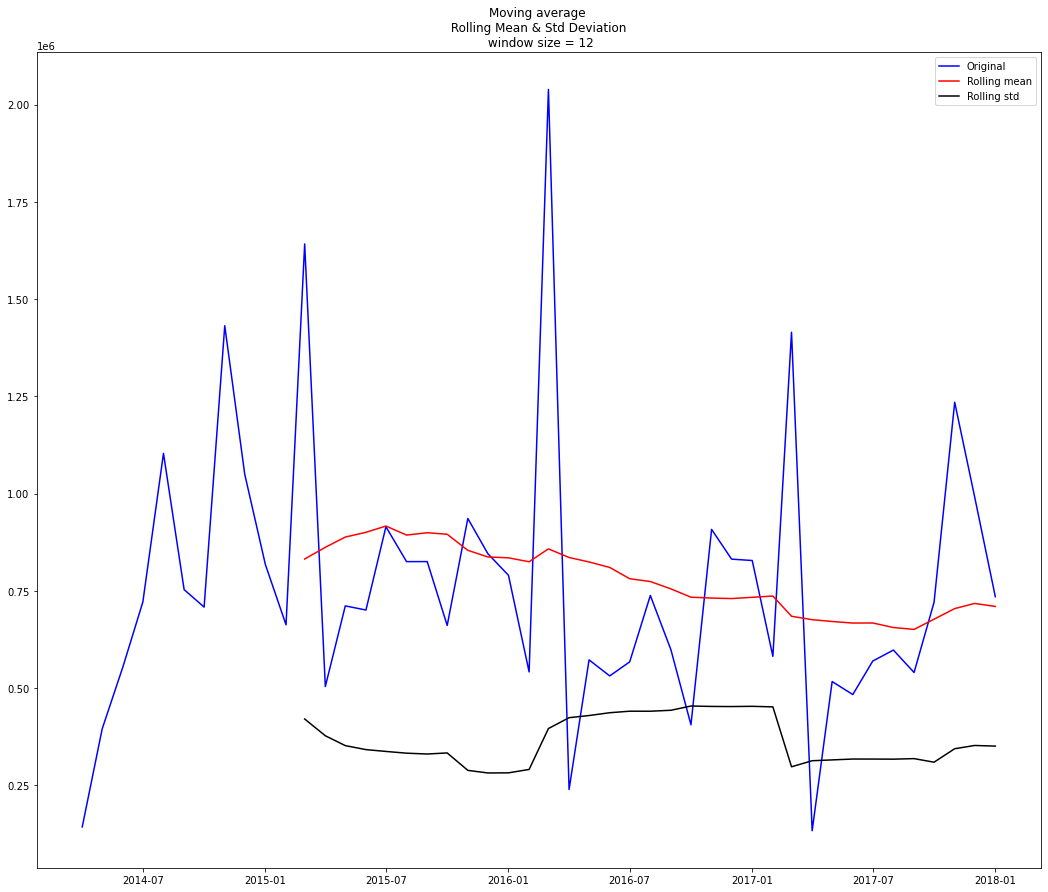

In [132]:
# Calling the moving average function on Uttar Pradesh - ABC Manufacturing company
moving_average(UttarPradesh_ABCManufac,12)

In [133]:
# Using Adfuller also to check the stationary

adfuller_test(UttarPradesh_ABCManufac['Monthly Sales Value'])

ADF Test Statistic : -7.642921639620189
p-value : 1.8751218314769654e-11
#Lags Used : 0
Number of Observations Used : 45
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Holt Winter's Additive Model with trend and seasonality 

In [134]:
UttarPradesh_ABCManufac_exp = UttarPradesh_ABCManufac.squeeze() # Convert into series data type

In [135]:
Exp_model = ExponentialSmoothing(np.asarray(UttarPradesh_ABCManufac_exp) ,seasonal_periods=12 ,trend='add', seasonal='add')

In [136]:
Exponential_model = Exp_model.fit()
print(Exponential_model.params)

{'smoothing_level': 0.1817857142857143, 'smoothing_trend': 9.999999999999999e-05, 'smoothing_seasonal': 0.40910714285714284, 'damping_trend': nan, 'initial_level': 254564.64, 'initial_trend': 2169.9243750000037, 'initial_seasons': array([-111869.64,  140519.07,  299297.43,  466363.44,  848744.33,
        498340.08,  453456.9 , 1176912.18,  795060.63,  562854.96,
        407844.99, 1387278.9 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [137]:
UttarPradesh_ABCManufac_exp_pred = Exponential_model.forecast(46)

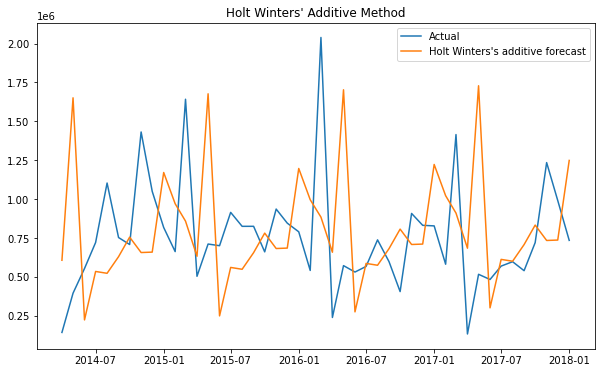

In [138]:
plt.figure(figsize=(10,6))
plt.plot(UttarPradesh_ABCManufac.index,UttarPradesh_ABCManufac, label='Actual')
plt.plot(UttarPradesh_ABCManufac.index, UttarPradesh_ABCManufac_exp_pred, label='Holt Winters\'s additive forecast')
plt.title('Holt Winters\' Additive Method')
plt.legend(loc='best')
plt.show()

### MSE - Mean Squared Error is calculated by taking the average of the square of the difference between the original and predicted values of the data. Mean Squared error is used to determine the model's performance. 

### RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.




In [139]:
from sklearn.metrics import mean_squared_error

rmse_exp = np.sqrt(mean_squared_error(UttarPradesh_ABCManufac[41:45], UttarPradesh_ABCManufac_exp_pred[41:45])).round(2)

print(rmse_exp)

298360.37


### Mean Absolute Percentage Error (MAPE) is a statistical measure to define the accuracy of a model. MAPE can also be expressed in terms of percentage. Lower the MAPE, better fit is the model.

In [140]:
mape_exp = np.round(np.mean(np.abs(UttarPradesh_ABCManufac_exp[41:45]-UttarPradesh_ABCManufac_exp_pred[41:45])/UttarPradesh_ABCManufac_exp[41:45])*100,2)

print(mape_exp)

28.22


# Auto Regressive Model

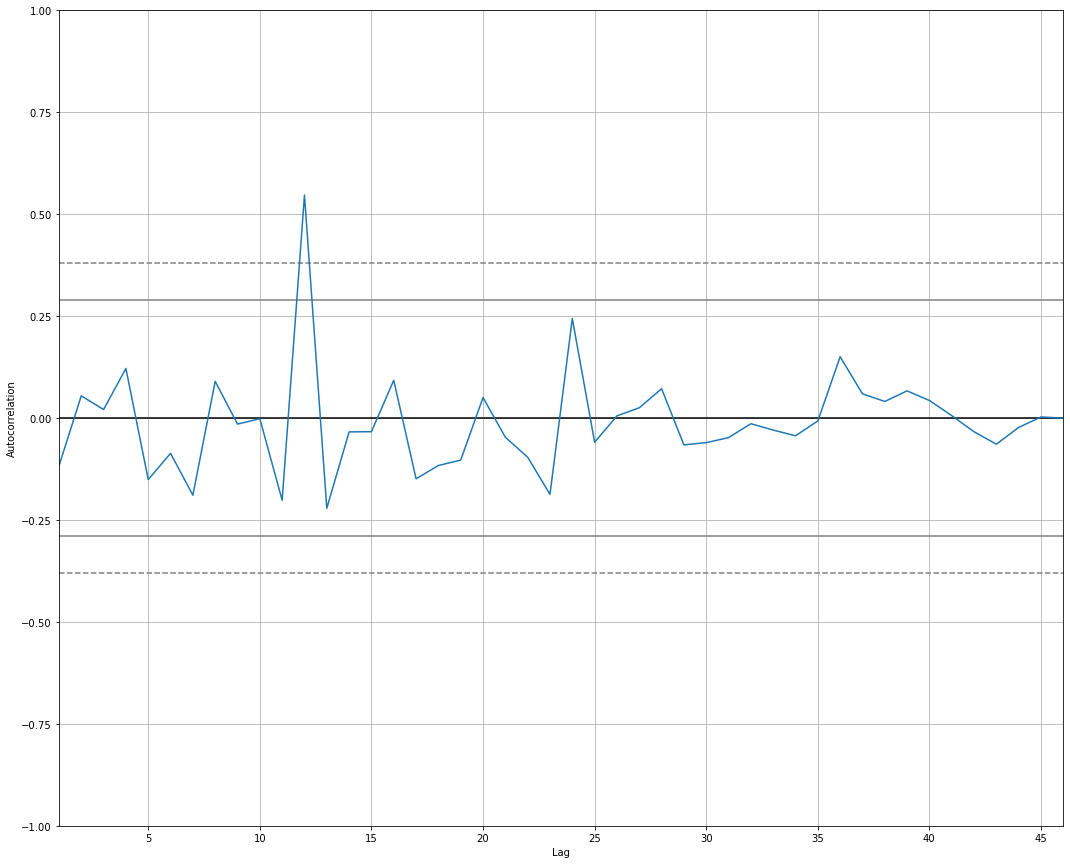

In [141]:
autocorrelation_plot(UttarPradesh_ABCManufac['Monthly Sales Value'])
plt.show()

In [142]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

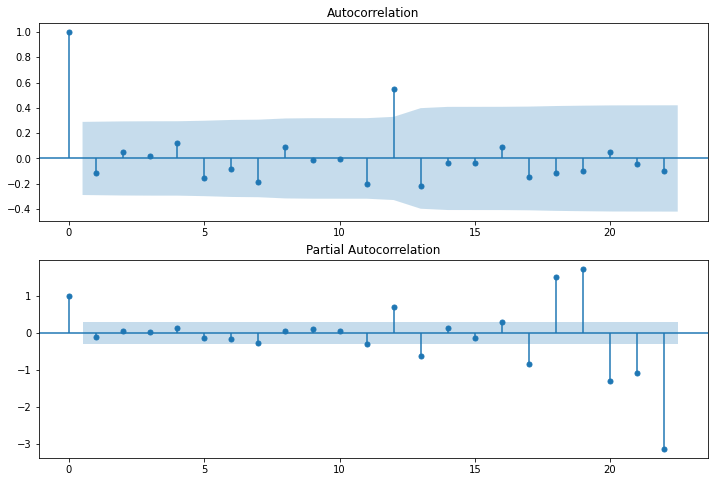

In [143]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,1,1)
fig = sm.graphics.tsa.plot_acf(UttarPradesh_ABCManufac['Monthly Sales Value'],lags=22,ax=ax1)
ax2 = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_pacf(UttarPradesh_ABCManufac['Monthly Sales Value'],lags=22,ax=ax2)

In [144]:
# For non - seasonal data 
# p=1, d=0, q = 0
from statsmodels.tsa.arima_model import ARIMA

In [145]:
model = ARIMA(UttarPradesh_ABCManufac['Monthly Sales Value'], order =(1,0,0))

C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [146]:
model_fit = model.fit()

In [147]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     Monthly Sales Value   No. Observations:                   46
Model:                      ARMA(1, 0)   Log Likelihood                -652.836
Method:                        css-mle   S.D. of innovations         352563.590
Date:                 Sun, 12 Sep 2021   AIC                           1311.672
Time:                         09:49:45   BIC                           1317.158
Sample:                     04-01-2014   HQIC                          1313.727
                          - 01-01-2018                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       7.61e+05   4.65e+04     16.379      0.000     6.7e+05    8.52e+05
ar.L1.Monthly Sales Value    -0.1227      0.150     -0.819      0.413      -0.416       0.171
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -8.1505           +0.0000j            8.1505            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

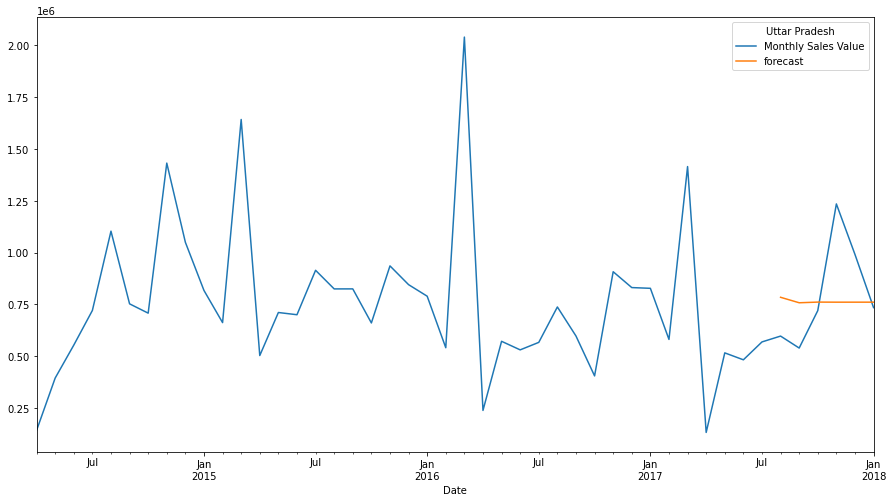

In [148]:
UttarPradesh_ABCManufac['forecast']=model_fit.predict(start=40,end=50,dynamic=True)
UttarPradesh_ABCManufac[['Monthly Sales Value','forecast']].plot(figsize=(15,8))

### ARIMA is not showing results properly as there is seasonality let's check the model with SARIMA

In [149]:
import itertools

In [150]:
# Define the p, d and q parameters to take any value between 0 and 2

p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets

pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### We can now use the triplets of parameters defined above to automate the process of training and evaluating ARIMA models on different combinations. In Statistics and Machine Learning, this process is known as grid search (or hyperparameter optimization) for model selection.

In [151]:
def optimal_parameters(state):
    
    for y in pdq:
        for z in seasonal_pdq:
            try:
                seasonal_model = sm.tsa.statespace.SARIMAX(UttarPradesh_ABCManufac['Monthly Sales Value'],
                                order= y,seasonal_order= z,enforce_stationarity=False,enforce_invertibility=False)
            
                results = seasonal_model.fit()
            
                print('SARIMAX{}x{} - AIC:{}'.format(y, z, results.aic))
            
            except:
                continue
            

In [152]:
optimal_parameters(UttarPradesh_ABCManufac['Monthly Sales Value'])

C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:1358.3563883377149
SARIMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:10478074.80941924


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:911.6109266189504


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:568.255605535217
SARIMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:937.0598257358365


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:10223848.924250485
SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:602.7008855364219


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:569.8509785180772
SARIMAX(0, 0, 1)x(0, 0, 0, 12) - AIC:1315.3176451648476


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:10005502.070422642
SARIMAX(0, 0, 1)x(0, 1, 0, 12) - AIC:882.4554967433969

C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



SARIMAX(0, 0, 1)x(0, 1, 1, 12) - AIC:541.0305564883311


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 0, 1)x(1, 0, 0, 12) - AIC:999.7638705413051
SARIMAX(0, 0, 1)x(1, 0, 1, 12) - AIC:10068120.832729563


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fr

SARIMAX(0, 0, 1)x(1, 1, 0, 12) - AIC:604.0065195846814


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 0, 1)x(1, 1, 1, 12) - AIC:542.6966422653554
SARIMAX(0, 1, 0)x(0, 0, 0, 12) - AIC:1287.3671104993668


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 1, 0)x(0, 0, 1, 12) - AIC:3328758.1883571604
SARIMAX(0, 1, 0)x(0, 1, 0, 12) - AIC:898.9065711783272


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 1, 0)x(0, 1, 1, 12) - AIC:546.3705776099944
SARIMAX(0, 1, 0)x(1, 0, 0, 12) - AIC:922.3678376069867


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 1, 0)x(1, 0, 1, 12) - AIC:2033467.9346482889
SARIMAX(0, 1, 0)x(1, 1, 0, 12) - AIC:565.7816264434084


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 1, 0)x(1, 1, 1, 12) - AIC:548.0886707915381
SARIMAX(0, 1, 1)x(0, 0, 0, 12) - AIC:1236.4049361569662


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 1, 1)x(0, 0, 1, 12) - AIC:3239463.5254144752
SARIMAX(0, 1, 1)x(0, 1, 0, 12) - AIC:863.2557490698999


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 1, 1)x(0, 1, 1, 12) - AIC:516.9073570131602


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 1, 1)x(1, 0, 0, 12) - AIC:922.9830582295792


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 1, 1)x(1, 0, 1, 12) - AIC:1967051.2812335843


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 1, 1)x(1, 1, 0, 12) - AIC:574.0952828834415


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(0, 1, 1)x(1, 1, 1, 12) - AIC:518.3799840658527
SARIMAX(1, 0, 0)x(0, 0, 0, 12) - AIC:1313.4856061981209
SARIMAX(1, 0, 0)x(0, 0, 1, 12) - AIC:3149519.8864032654


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fr

SARIMAX(1, 0, 0)x(0, 1, 0, 12) - AIC:909.6670673645846


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 0, 0)x(0, 1, 1, 12) - AIC:567.3271453402267
SARIMAX(1, 0, 0)x(1, 0, 0, 12) - AIC:938.8669484992251


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 0, 0)x(1, 0, 1, 12) - AIC:2085861.9998126808


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 0, 0)x(1, 1, 0, 12) - AIC:570.3774594416553


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 0, 0)x(1, 1, 1, 12) - AIC:568.8953230449646
SARIMAX(1, 0, 1)x(0, 0, 0, 12) - AIC:1266.1054891185006


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 0, 1)x(0, 0, 1, 12) - AIC:2911602.5997500042
SARIMAX(1, 0, 1)x(0, 1, 0, 12) - AIC:883.8325610836265


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 0, 1)x(0, 1, 1, 12) - AIC:542.4130312141499


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 0, 1)x(1, 0, 0, 12) - AIC:929.0112522317565


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 0, 1)x(1, 0, 1, 12) - AIC:1971856.3430564422


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 0, 1)x(1, 1, 0, 12) - AIC:572.8235012614084


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 0, 1)x(1, 1, 1, 12) - AIC:544.0175394415317
SARIMAX(1, 1, 0)x(0, 0, 0, 12) - AIC:1270.9380181503577


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 1, 0)x(0, 0, 1, 12) - AIC:2340866.2640552153
SARIMAX(1, 1, 0)x(0, 1, 0, 12) - AIC:892.1284237784512


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 1, 0)x(0, 1, 1, 12) - AIC:546.1641326501689
SARIMAX(1, 1, 0)x(1, 0, 0, 12) - AIC:905.2304209079398


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 1, 0)x(1, 0, 1, 12) - AIC:1941070.35785357
SARIMAX(1, 1, 0)x(1, 1, 0, 12) - AIC:548.4370469462539


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 1, 0)x(1, 1, 1, 12) - AIC:547.7170408910022
SARIMAX(1, 1, 1)x(0, 0, 0, 12) - AIC:1236.2726853814681


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 1, 1)x(0, 0, 1, 12) - AIC:2053339.6890327046
SARIMAX(1, 1, 1)x(0, 1, 0, 12) - AIC:864.9808207061374


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 1, 1)x(0, 1, 1, 12) - AIC:518.9076964147498


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 1, 1)x(1, 0, 0, 12) - AIC:900.1337194350705


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 1, 1)x(1, 0, 1, 12) - AIC:1773269.0101850964


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 1, 1)x(1, 1, 0, 12) - AIC:549.1131052738614


C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMAX(1, 1, 1)x(1, 1, 1, 12) - AIC:520.4080995365644


### In the above output SARIMAX(0, 1, 1)x(0, 1, 1, 12) - AIC:516.9073570131602 gives the lowest AIC value among all the other options. This set of parameters yields the best performance for our model.

In [153]:
# Optional parameter values into a new SARIMAX model

model=sm.tsa.statespace.SARIMAX(UttarPradesh_ABCManufac['Monthly Sales Value'],
                            order=(0, 1, 1),seasonal_order=(0,1,1,12))
results=model.fit()

C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRASANNA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [154]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                Monthly Sales Value   No. Observations:                   46
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -457.583
Date:                            Sun, 12 Sep 2021   AIC                            921.166
Time:                                    09:50:14   BIC                            925.655
Sample:                                04-01-2014   HQIC                           922.676
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3877      0.125     -3.112      0.002      -0.632      -0.143
ma.S.L12      -0.2266      0.074     -3.078      0.002      -0.371      -0.082
sigma2      5.929e+10   1.96e-13   3.03e+23      0.000    5.93e+10    5.93e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                 2.81
Prob(Q):                              0.35   Prob(JB):                         0.24
Heteroskedasticity (H):               0.53   Skew:                             0.08
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.75e+39. Standard errors may be unstable.
"""

### When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

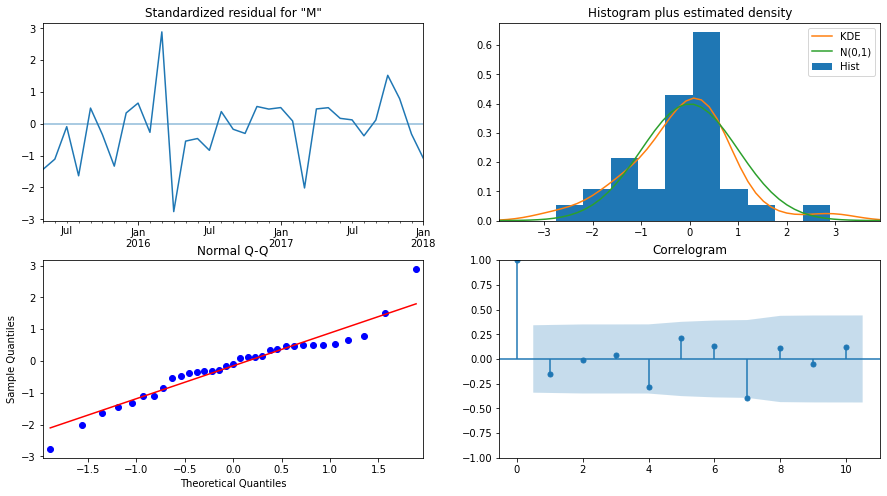

In [155]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()

###  On the top left plot, the residuals of our model are uncorrelated and normally distributed with zero-mean.
###  On the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
###  The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
###  The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

## Comparing the Forecast

### We are comparing the predicted forecast with the real sales values for the last 12 months from Jan 2017 to Jan 2018

<AxesSubplot:xlabel='Date'>

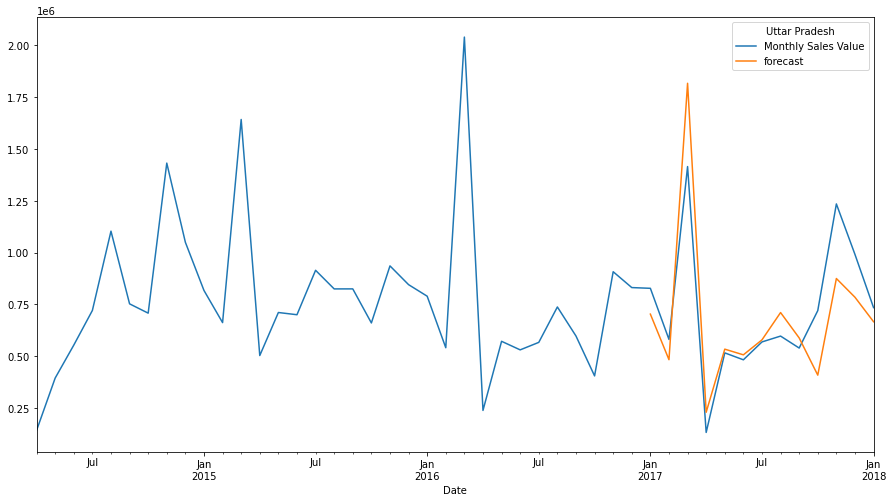

In [156]:
UttarPradesh_ABCManufac['forecast']=results.predict(start=33,end=46,dynamic=True)
UttarPradesh_ABCManufac[['Monthly Sales Value','forecast']].plot(figsize=(15,8))

In [157]:
from pandas.tseries.offsets import DateOffset
future_dates=[UttarPradesh_ABCManufac.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [158]:
future_dates_UttarPradesh_ABCManufac=pd.DataFrame(index=future_dates[1:],columns=UttarPradesh_ABCManufac.columns)

In [159]:
future_dates_UttarPradesh_ABCManufac.tail()

Uttar Pradesh Monthly Sales Value forecast
2018-08-01                    NaN      NaN
2018-09-01                    NaN      NaN
2018-10-01                    NaN      NaN
2018-11-01                    NaN      NaN
2018-12-01                    NaN      NaN

In [160]:
future_UttarPradesh_ABCManufac=pd.concat([UttarPradesh_ABCManufac,future_dates_UttarPradesh_ABCManufac])

### Prediction for the next 12 months

<AxesSubplot:>

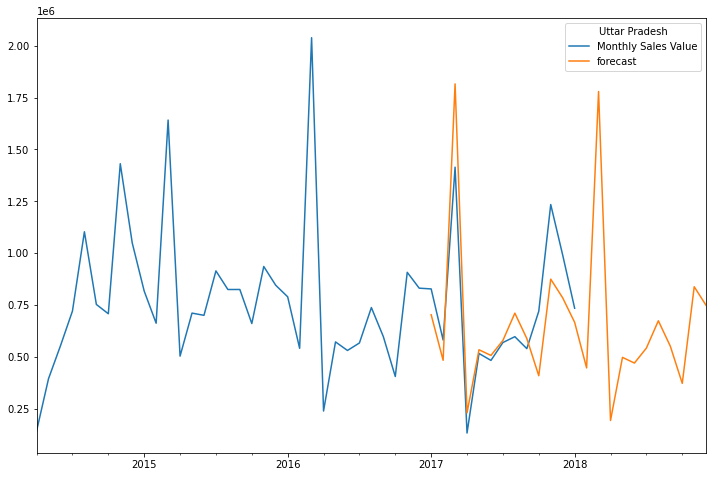

In [161]:
future_UttarPradesh_ABCManufac['forecast'] = results.predict(start = 33, end = 58 , dynamic= True).round(2) 
future_UttarPradesh_ABCManufac[['Monthly Sales Value', 'forecast']].plot(figsize=(12, 8)) 

In [162]:
future_UttarPradesh_ABCManufac.tail(20)

Uttar Pradesh  Monthly Sales Value    forecast
2017-05-01               516515.67   534470.00
2017-06-01               483089.13   507035.94
2017-07-01               569271.91   579246.68
2017-08-01               597466.93   710924.17
2017-09-01               539775.09   588559.51
2017-10-01               720295.87   409135.89
2017-11-01              1234663.97   874977.67
2017-12-01               991006.52   784674.44
2018-01-01               734645.70   666588.82
2018-02-01                     NaN   446851.89
2018-03-01                     NaN  1779518.54
2018-04-01                     NaN   193410.10
2018-05-01                     NaN   497706.98
2018-06-01                     NaN   470272.92
2018-07-01                     NaN   542483.66
2018-08-01                     NaN   674161.14
2018-09-01                     NaN   551796.48
2018-10-01                     NaN   372372.87
2018-11-01                     NaN   838214.64
2018-12-01                     NaN   747911.42

In [163]:
rmse_SARIMA_UP = np.sqrt(mean_squared_error(UttarPradesh_ABCManufac['Monthly Sales Value'][41:45], 
                                      future_UttarPradesh_ABCManufac['forecast'][41:45])).round(2)

print(rmse_SARIMA_UP)

260359.18


In [164]:
rmse_SARIMA_UP = np.sqrt(mean_squared_error(UttarPradesh_ABCManufac['Monthly Sales Value'][33:45], 
                                      future_UttarPradesh_ABCManufac['forecast'][33:45])).round(2)

print(rmse_SARIMA_UP)

200151.55


In [165]:
mape_SARIMA_UP = np.round(np.mean(np.abs(UttarPradesh_ABCManufac['Monthly Sales Value'][41:45]-future_UttarPradesh_ABCManufac['forecast'][41:45])/UttarPradesh_ABCManufac['Monthly Sales Value'][41:45])*100,2)

print(mape_SARIMA_UP)

25.55


## Forecasting Using FbProphet

In [166]:
from fbprophet import Prophet  # Importinng FbProphet library

In [167]:
df.head() # Already preprocessed Dataset from the above having state, companies, Monthly Sales value & Date.

STATE            COMPANY  Monthly Sales Value       Date
0  Haryana  ABC Manufacturing             32577.66 2014-04-01
1  Haryana  ABC Manufacturing            107146.53 2014-08-01
2  Haryana  ABC Manufacturing            127656.94 2014-12-01
3  Haryana  ABC Manufacturing            107427.06 2015-02-01
4  Haryana  ABC Manufacturing            128078.82 2015-01-01

### Uttar Pradesh Pesticides Sales

In [168]:
# Filtering for all the Monthly Sales values that are from Uttar Pradesh and ABC Manufacturing and creating a data frame
df_UttarPradesh = df[(df['STATE']=='Uttar Pradesh')&(df['COMPANY']=='ABC Manufacturing')].sort_values(by ='Date')

In [169]:
df_UttarPradesh.head() # Displays the first 5 rows of the dataset

STATE            COMPANY  Monthly Sales Value       Date
1510  Uttar Pradesh  ABC Manufacturing            142695.00 2014-04-01
1518  Uttar Pradesh  ABC Manufacturing            395083.71 2014-05-01
1516  Uttar Pradesh  ABC Manufacturing            553862.07 2014-06-01
1515  Uttar Pradesh  ABC Manufacturing            720928.08 2014-07-01
1511  Uttar Pradesh  ABC Manufacturing           1103308.97 2014-08-01

In [170]:
df_UttarPradesh.shape # To check the size of the Data Frame

(46, 4)

In [171]:
# Choosing only the columns required for the forecast as all the dataset have the same Company and State name

df_UttarPradesh = df_UttarPradesh[['Date','Monthly Sales Value']]

In [172]:
df_UttarPradesh.head() # Displays for 5 rows of the data frame as we are checking the data frame after above changes.

Date  Monthly Sales Value
1510 2014-04-01            142695.00
1518 2014-05-01            395083.71
1516 2014-06-01            553862.07
1515 2014-07-01            720928.08
1511 2014-08-01           1103308.97

[Text(0.5, 1.0, 'Uttar Pradesh - ABC Manufacturing monthly wise sales')]

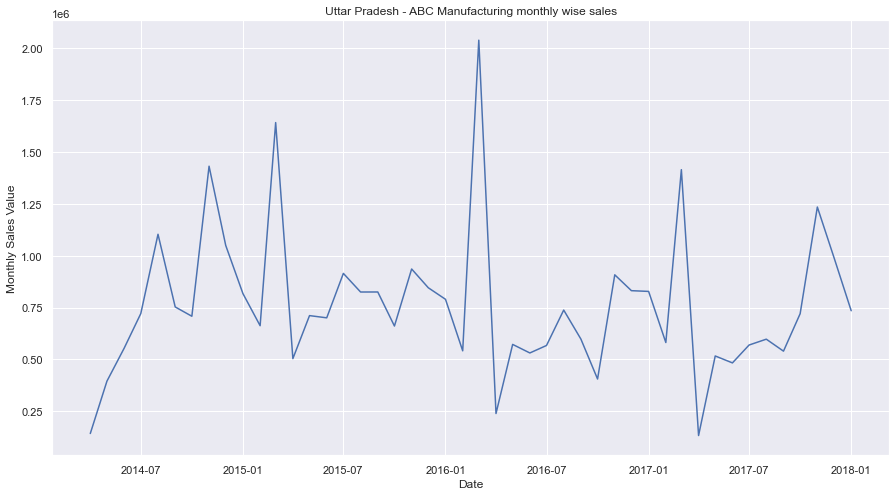

In [173]:
# Setting the figure size in seaborn
sns.set(rc = {'figure.figsize':(15,8)})

# Setting the background of the plot as dark
# sns.set(style="dark")

# Plotting line plot for Uttar Pradesh - ABC Manufacturing monthly wise sales 
sns.lineplot(x=df_UttarPradesh['Date'],
             y=df_UttarPradesh['Monthly Sales Value'],
             data=df_UttarPradesh).set(title='Uttar Pradesh - ABC Manufacturing monthly wise sales')

### Need to change the date column name to 'ds' and sales column name to 's' in the FbProphet, it is like rule

In [174]:
# Changing the column names 
df_UttarPradesh.columns = ['ds','y']
df_UttarPradesh.head()

ds           y
1510 2014-04-01   142695.00
1518 2014-05-01   395083.71
1516 2014-06-01   553862.07
1515 2014-07-01   720928.08
1511 2014-08-01  1103308.97

In [175]:
# Creating the FbProphet model and fitting to the Data frame

model_UttarPradesh = Prophet(interval_width=0.95)
model_UttarPradesh.fit(df_UttarPradesh)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### It is taking yearly seasonality as it observed, so disabled daily and weekly seasonality

In [176]:
# Component modes show what seasonality it has taken in the model
model_UttarPradesh.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [177]:
# Create future dates of 365 days

future_dates_UttarPradesh=model_UttarPradesh.make_future_dataframe(periods=12, freq = 'MS')

In [178]:
# Displaying future dates for the next 12 months

future_dates_UttarPradesh.tail()

ds
53 2018-09-01
54 2018-10-01
55 2018-11-01
56 2018-12-01
57 2019-01-01

In [179]:
# Doing the prediction using the model - FbProphet on the future dates.

prediction_UttarPradesh=model_UttarPradesh.predict(future_dates_UttarPradesh)

In [180]:
# Displaying the prediction results - yhat

prediction_UttarPradesh.head() 

ds          trend     yhat_lower    yhat_upper    trend_lower  \
0 2014-04-01  897297.235004  120467.187386  6.002078e+05  897297.235004   
1 2014-05-01  893129.203341  400688.649884  8.530146e+05  893129.203341   
2 2014-06-01  888822.237266  390917.816732  8.839993e+05  888822.237266   
3 2014-07-01  884654.205581  545144.003028  1.050648e+06  884654.205581   
4 2014-08-01  880347.239507  629487.498284  1.135844e+06  880347.239507   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  897297.235004  -534083.409584        -534083.409584        -534083.409584   
1  893129.203341  -275878.526197        -275878.526197        -275878.526197   
2  888822.237266  -254108.616011        -254108.616011        -254108.616011   
3  884654.205581  -102221.559538        -102221.559538        -102221.559538   
4  880347.239507     2296.726586           2296.726586           2296.726586   

          yearly   yearly_lower   yearly_upper  multiplicative_terms  \
0 -534083.409584 -534083.409584 -534083.409584                   0.0   
1 -275878.526197 -275878.526197 -275878.526197                   0.0   
2 -254108.616011 -254108.616011 -254108.616011                   0.0   
3 -102221.559538 -102221.559538 -102221.559538                   0.0   
4    2296.726586    2296.726586    2296.726586                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                         0.0                         0.0  363213.825420  
1                         0.0                         0.0  617250.677144  
2                         0.0                         0.0  634713.621255  
3                         0.0                         0.0  782432.646043  
4                         0.0                         0.0  882643.966093

In [181]:
prediction_UttarPradesh[['ds','yhat']].head() # Predicted values for the Time Series

ds           yhat
0 2014-04-01  363213.825420
1 2014-05-01  617250.677144
2 2014-06-01  634713.621255
3 2014-07-01  782432.646043
4 2014-08-01  882643.966093

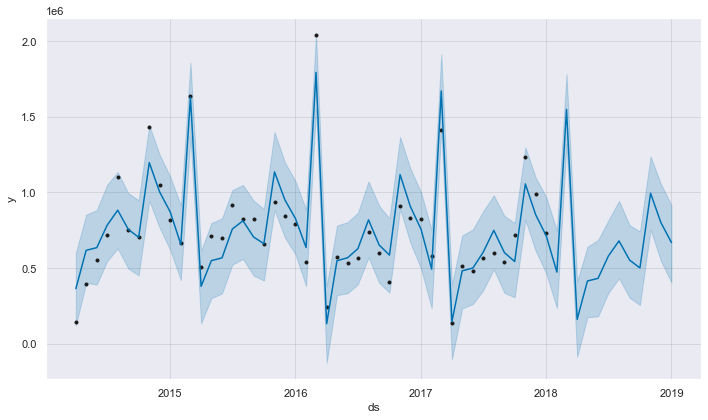

In [182]:
# Plot the predicted sales for next 365 days

plot_UttarPradesh = model_UttarPradesh.plot(prediction_UttarPradesh)

#### In this plot black dots are the Actual Sales Values
#### Blue line is the predicted line and it is predicted for next 365 days also
#### And the blue space around the blue line is the Trend

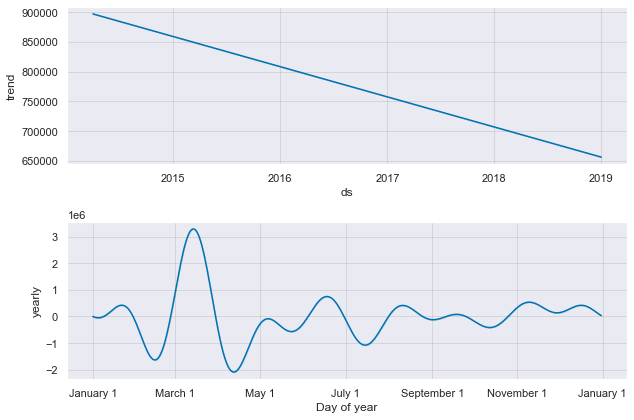

In [183]:
# Visualize Each Components[Trends,yearly]

plot_components_UttarPradesh = model_UttarPradesh.plot_components(prediction_UttarPradesh)

#### Trend for Uttar Pradesh is going down yearly
#### Yearly the graph was showing how each month the sales are doing

## Time Series Analysis

### Sales data given from 04-2014 to 01-2018

### Cross Validation of the Time Series is not done as other model, where we take random train and test dataset. But in Time

### 04-2014 to 03-2017 taking as Train dataset
### 04-2017 to 01-2018 taking as Test dataset
### 02-2018 to 06-2019 doing Validation

In [ ]:
# Import modules for cross validation of FbProphet
from fbprophet.diagnostics import cross_validation

# Doing cross validation on the Uttar Pradesh State Wise Sales
df_UttarPradesh_cv = cross_validation(model_UttarPradesh, initial='730 days', period='75 days', horizon = '150 days')
df_UttarPradesh_cv.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2016-05-11 00:00:00 and 2017-08-04 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Import modules for performance metrics of FbProphet
from fbprophet.diagnostics import performance_metrics

# Doing performance metrics on the Uttar Pradesh State Wise Sales, i.e calculating mse, rmse,mae etc from cross validation
df_UttarPradesh_p = performance_metrics(df_UttarPradesh_cv)
df_UttarPradesh_p.head()

In [ ]:
# Import modules for plot cross validation metric of FbProphet plot
from fbprophet.plot import plot_cross_validation_metric

# Plotting the validation results and RMSE for the 150 days of prediction
fig_UttarPradesh = plot_cross_validation_metric(df_UttarPradesh_cv, metric='rmse' )

In [185]:
# Creating Data frame with actual & predicted value using Join

FbProphet_UP = prediction_UttarPradesh.set_index('ds')[['yhat']].join(df_UttarPradesh.set_index('ds').y).reset_index()
FbProphet_UP.dropna(inplace=True)

In [186]:
FbProphet_UP.head()

ds           yhat           y
0 2014-04-01  363213.825420   142695.00
1 2014-05-01  617250.677144   395083.71
2 2014-06-01  634713.621255   553862.07
3 2014-07-01  782432.646043   720928.08
4 2014-08-01  882643.966093  1103308.97

In [187]:
# Checking the RMSE of Prophet model

rmse_FbProphet_UP =  np.sqrt(mean_squared_error(FbProphet_UP.y[41:45], FbProphet_UP.yhat[41:45]))

In [188]:
rmse_FbProphet_UP

146480.61976284598

In [189]:
mape_FbProphet_UP = np.round(np.mean(np.abs(FbProphet_UP.y[41:45]-FbProphet_UP.yhat[41:45])/FbProphet_UP.y[41:45])*100,2)
print(mape_FbProphet_UP)

16.11


## Conclusion:
#### The performance of the models were evaluated using RMSE & MAPE

#### According to our observation, the RMSE & MAPE for Holt Winters, Seasonal ARIMA is more than FbProphet modeling. So, we can go ahead with FbProphet model.

## Punjab Pesticide Sales Forecast


In [190]:
# Filtering for all the Monthly Sales values that are from Uttar Pradesh and ABC Manufacturing and creating a data frame
df_Punjab = df[(df['STATE']=='Punjab')&(df['COMPANY']=='ABC Manufacturing')].sort_values(by ='Date')

In [191]:
df_Punjab.head() # Displays the first 5 rows of the dataset

STATE            COMPANY  Monthly Sales Value       Date
809  Punjab  ABC Manufacturing            181633.19 2014-04-01
817  Punjab  ABC Manufacturing            184528.94 2014-05-01
815  Punjab  ABC Manufacturing            151493.08 2014-06-01
814  Punjab  ABC Manufacturing             99722.48 2014-07-01
810  Punjab  ABC Manufacturing            149691.92 2014-08-01

In [192]:
df_Punjab.shape # To check the size of the Data Frame

(46, 4)

In [193]:
# Choosing only the columns required for the forecast as all the dataset have the same Company and State name

df_Punjab = df_Punjab[['Date','Monthly Sales Value']]

In [194]:
df_Punjab.head() # Displays for 5 rows of the data frame as we are checking the data frame after above changes.

Date  Monthly Sales Value
809 2014-04-01            181633.19
817 2014-05-01            184528.94
815 2014-06-01            151493.08
814 2014-07-01             99722.48
810 2014-08-01            149691.92

[Text(0.5, 1.0, 'Punjab - ABC Manufacturing monthly wise sales')]

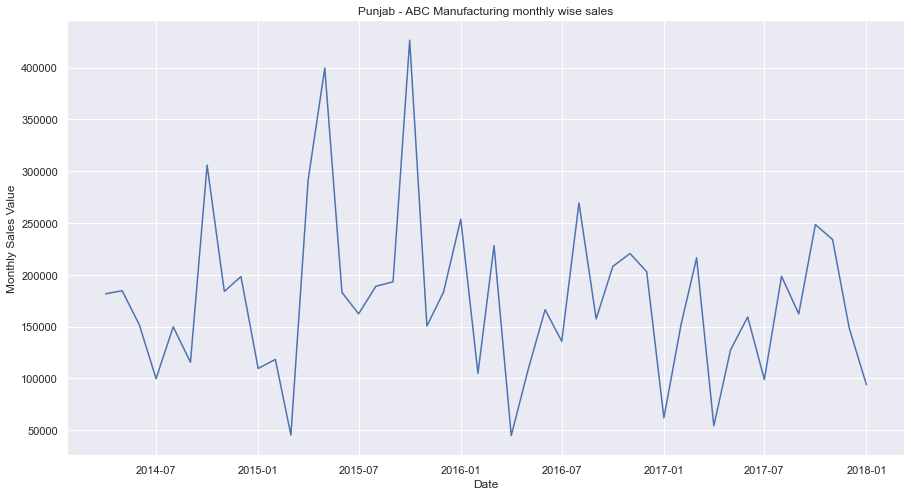

In [195]:
# Setting the figure size in seaborn
sns.set(rc = {'figure.figsize':(15,8)})

# Setting the background of the plot as dark
# sns.set(style="dark")

# Plotting line plot for Uttar Pradesh - ABC Manufacturing monthly wise sales 
sns.lineplot(x=df_Punjab['Date'],
             y=df_Punjab['Monthly Sales Value'],
             data=df_Punjab).set(title='Punjab - ABC Manufacturing monthly wise sales')

### Need to change the date column name to 'ds' and sales column name to 's' in the FbProphet, it is like rule

In [196]:
# Changing the column names 
df_Punjab.columns = ['ds','y']
df_Punjab.head()

ds          y
809 2014-04-01  181633.19
817 2014-05-01  184528.94
815 2014-06-01  151493.08
814 2014-07-01   99722.48
810 2014-08-01  149691.92

In [197]:
# Creating the FbProphet model and fitting to the Data frame

model_Punjab = Prophet()
model_Punjab.fit(df_Punjab)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### It is taking yearly seasonality as it observed, so disabled daily and weekly seasonality

In [198]:
# Component modes show what seasonality it has taken in the model
model_Punjab.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [199]:
# Create future dates of 365 days

future_dates_Punjab=model_Punjab.make_future_dataframe(periods=12, freq = 'MS')

In [200]:
# Displaying future dates for the next 12 months

future_dates_Punjab.tail()

ds
53 2018-09-01
54 2018-10-01
55 2018-11-01
56 2018-12-01
57 2019-01-01

In [201]:
# Doing the prediction using the model - FbProphet on the future dates.

prediction_Punjab=model_Punjab.predict(future_dates_Punjab)

In [202]:
# Displaying the prediction results - yhat

prediction_Punjab.head() 

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 2014-04-01  185787.163677  136551.272954  222248.520435  185787.163677   
1 2014-05-01  185336.658931  204598.916771  289665.603952  185336.658931   
2 2014-06-01  184871.137353  120866.264033  202871.040260  184871.137353   
3 2014-07-01  184420.632601   82126.496452  166879.029922  184420.632601   
4 2014-08-01  183955.111024  143349.184796  228630.507465  183955.111024   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  185787.163677    -4649.346688          -4649.346688          -4649.346688   
1  185336.658931    61056.907639          61056.907639          61056.907639   
2  184871.137353   -22250.621914         -22250.621914         -22250.621914   
3  184420.632601   -59680.023481         -59680.023481         -59680.023481   
4  183955.111024     2308.447485           2308.447485           2308.447485   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  -4649.346688  -4649.346688  -4649.346688                   0.0   
1  61056.907639  61056.907639  61056.907639                   0.0   
2 -22250.621914 -22250.621914 -22250.621914                   0.0   
3 -59680.023481 -59680.023481 -59680.023481                   0.0   
4   2308.447485   2308.447485   2308.447485                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                         0.0                         0.0  181137.816989  
1                         0.0                         0.0  246393.566569  
2                         0.0                         0.0  162620.515439  
3                         0.0                         0.0  124740.609120  
4                         0.0                         0.0  186263.558509

In [203]:
prediction_Punjab[['ds','yhat']].head() # Predicted values for the Time Series

ds           yhat
0 2014-04-01  181137.816989
1 2014-05-01  246393.566569
2 2014-06-01  162620.515439
3 2014-07-01  124740.609120
4 2014-08-01  186263.558509

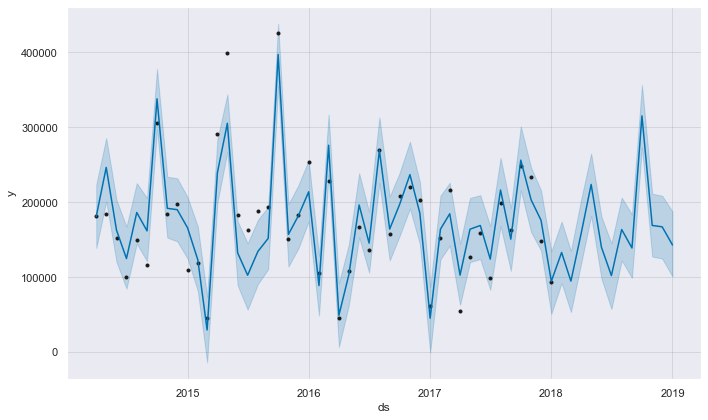

In [640]:
# Plot the predicted sales for next 365 days

plot_Punjab = model_Punjab.plot(prediction_Punjab)

#### In this plot black dots are the Actual Sales Values
#### Blue line is the predicted line and it is predicted for next 365 days also
#### And the blue space around the blue line is the Trend

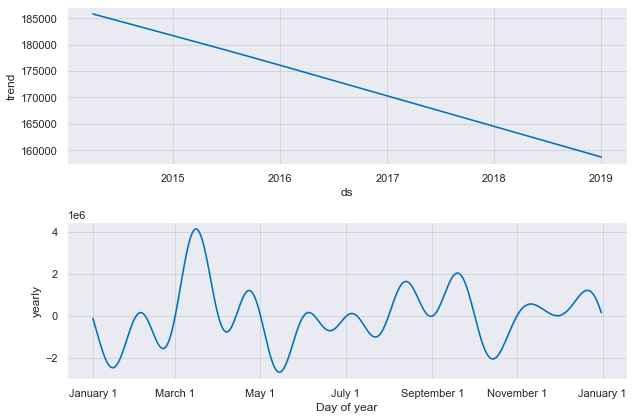

In [641]:
# Visualize Each Components[Trends,yearly]

plot_components_Punjab = model_Punjab.plot_components(prediction_Punjab)

#### Trend for Uttar Pradesh is going down yearly
#### Yearly the graph was showing how each month the sales are doing

In [ ]:
# Import modules for cross validation of FbProphet
from fbprophet.diagnostics import cross_validation

# Doing cross validation on the Punjab State Wise Sales
df_Punjab_cv = cross_validation(model_Punjab, initial='730 days', period='75 days', horizon = '150 days')
df_Punjab_cv.head()

In [ ]:
# Doing performance metrics on the Punjab State Wise Sales, i.e calculating mse, rmse,mae etc from cross validation

df_Punjab_p = performance_metrics(df_Punjab_cv)
df_Punjab_p.tail()

In [ ]:
# Plotting the validation results and RMSE for the 150 days of prediction

fig_Punjab = plot_cross_validation_metric(df_Punjab_cv, metric='rmse')

In [642]:
# Creating Data frame with actual & predicted value using Join

FbProphet_Punjab = prediction_Punjab.set_index('ds')[['yhat']].join(df_Punjab.set_index('ds').y).reset_index()
FbProphet_Punjab.dropna(inplace=True)

In [643]:
FbProphet_Punjab.head()

ds           yhat          y
0 2014-04-01  181137.816989  181633.19
1 2014-05-01  246393.566569  184528.94
2 2014-06-01  162620.515439  151493.08
3 2014-07-01  124740.609120   99722.48
4 2014-08-01  186263.558509  149691.92

In [644]:
# Checking the RMSE of Prophet model

rmse_FbProphet_Punjab =  np.sqrt(mean_squared_error(FbProphet_Punjab.y[41:45], FbProphet_Punjab.yhat[41:45]))

In [645]:
rmse_FbProphet_Punjab

21739.852405291647

In [667]:
mape_FbProphet_Punjab = np.round(np.mean(np.abs(FbProphet_Punjab.y[41:45]-FbProphet_Punjab.yhat[41:45])/FbProphet_Punjab.y[41:45])*100,2)
print(mape_FbProphet_Punjab)

10.46


## Haryana Pesticide Sales Forecast

In [647]:
# Filtering for all the Monthly Sales values that are from Uttar Pradesh and ABC Manufacturing and creating a data frame
df_Haryana = df[(df['STATE']=='Haryana')&(df['COMPANY']=='ABC Manufacturing')].sort_values(by ='Date')

In [648]:
df_Haryana.head()  # Displays the first 5 rows of the dataset

STATE            COMPANY  Monthly Sales Value       Date
0  Haryana  ABC Manufacturing             32577.66 2014-04-01
8  Haryana  ABC Manufacturing             47482.74 2014-05-01
6  Haryana  ABC Manufacturing            130684.18 2014-06-01
5  Haryana  ABC Manufacturing             75471.08 2014-07-01
1  Haryana  ABC Manufacturing            107146.53 2014-08-01

In [649]:
df_Haryana.shape # To check the size of the Data Frame

(46, 4)

In [650]:
# Choosing only the columns required for the forecast as all the dataset have the same Company and State name

df_Haryana = df_Haryana[['Date','Monthly Sales Value']]

In [651]:
df_Haryana.head() # Displays for 5 rows of the data frame as we are checking the data frame after above changes.

Date  Monthly Sales Value
0 2014-04-01             32577.66
8 2014-05-01             47482.74
6 2014-06-01            130684.18
5 2014-07-01             75471.08
1 2014-08-01            107146.53

[Text(0.5, 1.0, 'Haryana - ABC Manufacturing monthly wise sales')]

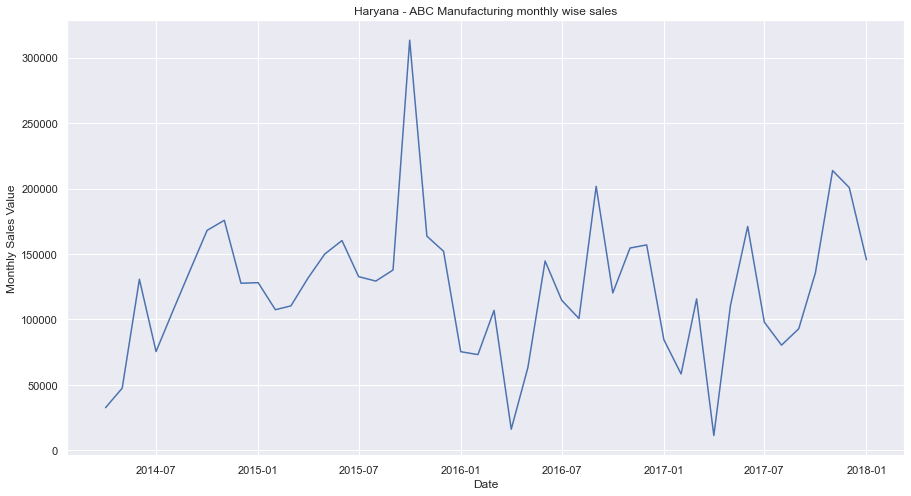

In [652]:
# Setting the figure size in seaborn
sns.set(rc = {'figure.figsize':(15,8)})

# Setting the background of the plot as dark
# sns.set(style="dark")

# Plotting line plot for Uttar Pradesh - ABC Manufacturing monthly wise sales 
sns.lineplot(x=df_Haryana['Date'],
             y=df_Haryana['Monthly Sales Value'],
             data=df_Haryana).set(title='Haryana - ABC Manufacturing monthly wise sales')

### Need to change the date column name to 'ds' and sales column name to 's' in the FbProphet, it is like rule

In [653]:
# Changing the column names 
df_Haryana.columns = ['ds','y']
df_Haryana.head()

ds          y
0 2014-04-01   32577.66
8 2014-05-01   47482.74
6 2014-06-01  130684.18
5 2014-07-01   75471.08
1 2014-08-01  107146.53

In [654]:
# Creating the FbProphet model and fitting to the Data frame

model_Haryana = Prophet()
model_Haryana.fit(df_Haryana)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### It is taking yearly seasonality as it observed, so disabled daily and weekly seasonality

In [655]:
# Component modes show what seasonality it has taken in the model
model_Haryana.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [656]:
# Create future dates of 365 days

future_dates_Haryana=model_Haryana.make_future_dataframe(periods=12, freq = 'MS')

In [657]:
# Displaying future dates for the next 12 months

future_dates_Haryana.tail()

ds
53 2018-09-01
54 2018-10-01
55 2018-11-01
56 2018-12-01
57 2019-01-01

In [658]:
# Doing the prediction using the model - FbProphet on the future dates.

prediction_Haryana=model_Haryana.predict(future_dates_Haryana)

In [659]:
# Displaying the prediction results - yhat

prediction_Haryana.head() 

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 2014-04-01  117320.495754   23988.731489   97444.936847  117320.495754   
1 2014-05-01  117268.672621   62206.750567  130349.273461  117268.672621   
2 2014-06-01  117215.122050  112439.288424  179171.915325  117215.122050   
3 2014-07-01  117163.298917   66229.657458  135035.151102  117163.298917   
4 2014-08-01  117109.748346   70334.892226  140115.427650  117109.748346   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  117320.495754   -55574.065023         -55574.065023         -55574.065023   
1  117268.672621   -19540.455908         -19540.455908         -19540.455908   
2  117215.122050    29164.355470          29164.355470          29164.355470   
3  117163.298917   -16243.770909         -16243.770909         -16243.770909   
4  117109.748346   -12121.915426         -12121.915426         -12121.915426   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0 -55574.065023 -55574.065023 -55574.065023                   0.0   
1 -19540.455908 -19540.455908 -19540.455908                   0.0   
2  29164.355470  29164.355470  29164.355470                   0.0   
3 -16243.770909 -16243.770909 -16243.770909                   0.0   
4 -12121.915426 -12121.915426 -12121.915426                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                         0.0                         0.0   61746.430730  
1                         0.0                         0.0   97728.216712  
2                         0.0                         0.0  146379.477520  
3                         0.0                         0.0  100919.528009  
4                         0.0                         0.0  104987.832921

In [660]:
prediction_Haryana[['ds','yhat']].head() # Predicted values for the Time Series

ds           yhat
0 2014-04-01   61746.430730
1 2014-05-01   97728.216712
2 2014-06-01  146379.477520
3 2014-07-01  100919.528009
4 2014-08-01  104987.832921

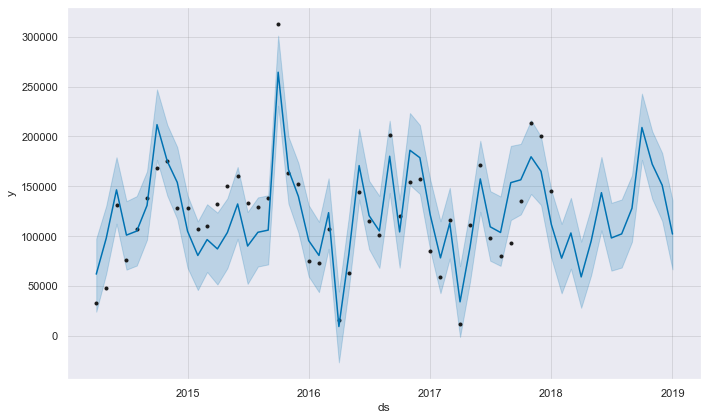

In [661]:
# Plot the predicted sales for next 365 days

plot_Haryana = model_Haryana.plot(prediction_Haryana)

#### In this plot black dots are the Actual Sales Values
#### Blue line is the predicted line and it is predicted for next 365 days also
#### And the blue space around the blue line is the Trend

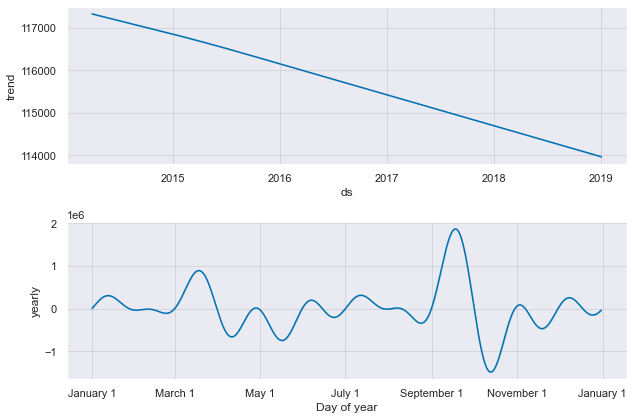

In [662]:
# Visualize Each Components[Trends,yearly]

plot_components_Haryana = model_Haryana.plot_components(prediction_Haryana)

#### Trend for Uttar Pradesh is going down yearly
#### Yearly the graph was showing how each month the sales are doing

In [ ]:
# Doing cross validation on the Haryana State Wise Sales

df_Haryana_cv = cross_validation(model_Haryana, initial='730 days', period='75 days', horizon = '150 days')
df_Haryana_cv.head()

In [ ]:
# Doing performance metrics on the Haryana State Wise Sales, i.e calculating mse, rmse,mae etc from cross validation

df_Haryana_p = performance_metrics(df_Haryana_cv)
df_Haryana_p.head()

In [ ]:
# Plotting the validation results and RMSE for the 150 days of prediction

fig_Haryana = plot_cross_validation_metric(df_Haryana_cv, metric='rmse')

In [663]:
# Creating Data frame with actual & predicted value using Join

FbProphet_Haryana = prediction_Haryana.set_index('ds')[['yhat']].join(df_Haryana.set_index('ds').y).reset_index()
FbProphet_Haryana.dropna(inplace=True)
FbProphet_Haryana.head()

ds           yhat          y
0 2014-04-01   61746.430730   32577.66
1 2014-05-01   97728.216712   47482.74
2 2014-06-01  146379.477520  130684.18
3 2014-07-01  100919.528009   75471.08
4 2014-08-01  104987.832921  107146.53

In [664]:
# Checking the RMSE of Prophet model

rmse_FbProphet_Haryana =  np.sqrt(mean_squared_error(FbProphet_Haryana.y[41:45], FbProphet_Haryana.yhat[41:45]))
print(rmse_FbProphet_Haryana)

40521.414924598124


In [668]:
mape_FbProphet_Haryana = np.round(np.mean(np.abs(FbProphet_Haryana.y[41:45]-FbProphet_Haryana.yhat[41:45])/FbProphet_Haryana.y[41:45])*100,2)
print(mape_FbProphet_Haryana)

28.65


## Himachal Pradesh Pesticide Sales Forecast

In [669]:
# Filtering for all the Monthly Sales values that are from Uttar Pradesh and ABC Manufacturing and creating a data frame
df_HimachalPradesh = df[(df['STATE']=='Himachal Pradesh')&(df['COMPANY']=='ABC Manufacturing')].sort_values(by ='Date')

In [670]:
df_HimachalPradesh.head()  # Displays the first 5 rows of the dataset

STATE            COMPANY  Monthly Sales Value       Date
679  Himachal Pradesh  ABC Manufacturing              6969.78 2014-04-01
687  Himachal Pradesh  ABC Manufacturing             10023.48 2014-05-01
685  Himachal Pradesh  ABC Manufacturing             18159.39 2014-06-01
684  Himachal Pradesh  ABC Manufacturing             14409.63 2014-07-01
680  Himachal Pradesh  ABC Manufacturing              7495.88 2014-08-01

In [671]:
df_HimachalPradesh.shape # To check the size of the Data Frame

(46, 4)

In [672]:
# Choosing only the columns required for the forecast as all the dataset have the same Company and State name

df_HimachalPradesh = df_HimachalPradesh[['Date','Monthly Sales Value']]

In [673]:
df_HimachalPradesh.head() # Displays for 5 rows of the data frame as we are checking the data frame after above changes.

Date  Monthly Sales Value
679 2014-04-01              6969.78
687 2014-05-01             10023.48
685 2014-06-01             18159.39
684 2014-07-01             14409.63
680 2014-08-01              7495.88

[Text(0.5, 1.0, 'HimachalPradesh - ABC Manufacturing monthly wise sales')]

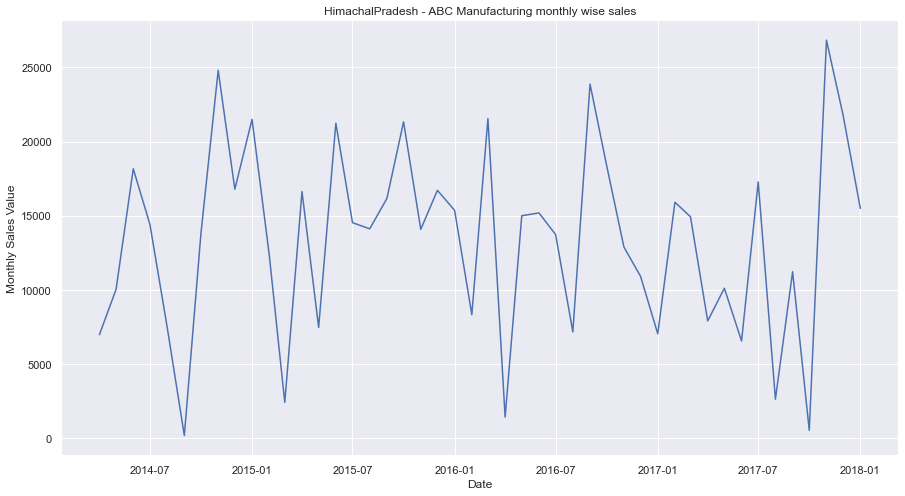

In [674]:
# Setting the figure size in seaborn
sns.set(rc = {'figure.figsize':(15,8)})

# Setting the background of the plot as dark
# sns.set(style="dark")

# Plotting line plot for Uttar Pradesh - ABC Manufacturing monthly wise sales 
sns.lineplot(x=df_HimachalPradesh['Date'],
             y=df_HimachalPradesh['Monthly Sales Value'],
             data=df_HimachalPradesh).set(title='HimachalPradesh - ABC Manufacturing monthly wise sales')

### Need to change the date column name to 'ds' and sales column name to 's' in the FbProphet, it is like rule

In [675]:
# Changing the column names 
df_HimachalPradesh.columns = ['ds','y']
df_HimachalPradesh.head()

ds         y
679 2014-04-01   6969.78
687 2014-05-01  10023.48
685 2014-06-01  18159.39
684 2014-07-01  14409.63
680 2014-08-01   7495.88

In [676]:
# Creating the FbProphet model and fitting to the Data frame

model_HimachalPradesh = Prophet()
model_HimachalPradesh.fit(df_HimachalPradesh)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### It is taking yearly seasonality as it observed, so disabled daily and weekly seasonality

In [677]:
# Component modes show what seasonality it has taken in the model
model_HimachalPradesh.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [678]:
# Create future dates of 365 days

future_dates_HimachalPradesh=model_HimachalPradesh.make_future_dataframe(periods=12, freq = 'MS')

In [679]:
# Displaying future dates for the next 12 months

future_dates_HimachalPradesh.tail()

ds
53 2018-09-01
54 2018-10-01
55 2018-11-01
56 2018-12-01
57 2019-01-01

In [680]:
# Doing the prediction using the model - FbProphet on the future dates.

prediction_HimachalPradesh=model_HimachalPradesh.predict(future_dates_HimachalPradesh)

In [684]:
# Displaying the prediction results - yhat

prediction_HimachalPradesh.head() 

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2014-04-01  14524.947471   5270.748200  17109.258363  14524.947471   
1 2014-05-01  14506.847942   4326.471996  15863.732552  14506.847942   
2 2014-06-01  14488.145093  10884.707909  22948.483037  14488.145093   
3 2014-07-01  14470.045561   8991.121263  20349.652853  14470.045561   
4 2014-08-01  14451.342710   3295.263670  14554.632084  14451.342710   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  14524.947471    -3470.136915          -3470.136915          -3470.136915   
1  14506.847942    -4557.917367          -4557.917367          -4557.917367   
2  14488.145093     2440.097373           2440.097373           2440.097373   
3  14470.045561      454.318576            454.318576            454.318576   
4  14451.342710    -5496.550566          -5496.550566          -5496.550566   

        yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0 -3470.136915  -3470.136915  -3470.136915                   0.0   
1 -4557.917367  -4557.917367  -4557.917367                   0.0   
2  2440.097373   2440.097373   2440.097373                   0.0   
3   454.318576    454.318576    454.318576                   0.0   
4 -5496.550566  -5496.550566  -5496.550566                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  11054.810556  
1                         0.0                         0.0   9948.930576  
2                         0.0                         0.0  16928.242465  
3                         0.0                         0.0  14924.364137  
4                         0.0                         0.0   8954.792143

In [685]:
prediction_HimachalPradesh[['ds','yhat']].head() # Predicted values for the Time Series

ds          yhat
0 2014-04-01  11054.810556
1 2014-05-01   9948.930576
2 2014-06-01  16928.242465
3 2014-07-01  14924.364137
4 2014-08-01   8954.792143

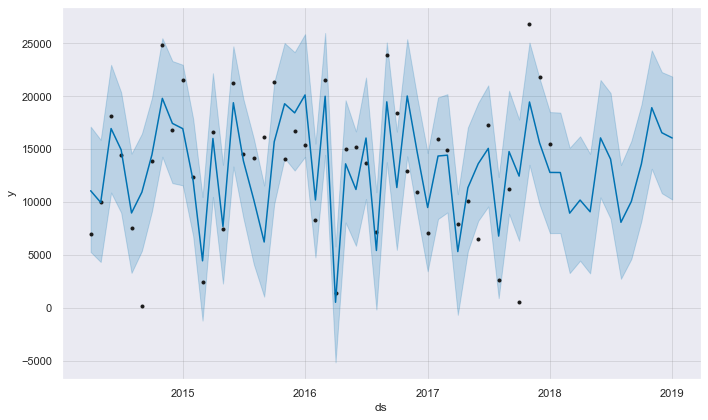

In [686]:
# Plot the predicted sales for next 365 days

plot_HimachalPradesh = model_HimachalPradesh.plot(prediction_HimachalPradesh)

#### In this plot black dots are the Actual Sales Values
#### Blue line is the predicted line and it is predicted for next 365 days also
#### And the blue space around the blue line is the Trend

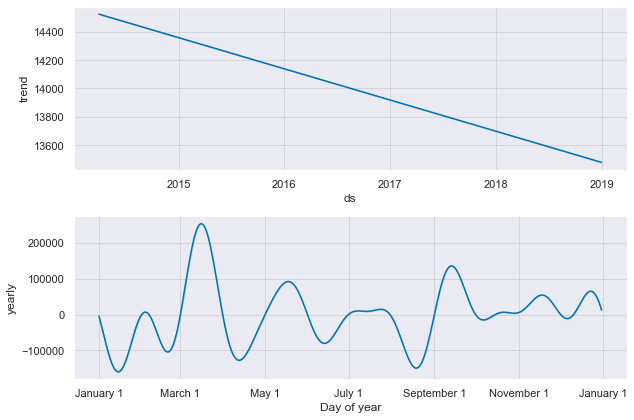

In [687]:
# Visualize Each Components[Trends,yearly]

plot_components_HimachalPradesh = model_HimachalPradesh.plot_components(prediction_HimachalPradesh)

#### Trend for Uttar Pradesh is going down yearly
#### Yearly the graph was showing how each month the sales are doing

In [ ]:
# Doing cross validation on the HimachalPradesh State Wise Sales

df_HimachalPradesh_cv = cross_validation(model_HimachalPradesh, initial='730 days', period='75 days', horizon = '150 days')
df_HimachalPradesh_cv.head()

In [ ]:
# Doing performance metrics on the HimachalPradesh State Wise Sales, i.e calculating mse, rmse,mae etc from cross validation

df_HimachalPradesh_p = performance_metrics(df_HimachalPradesh_cv)
df_HimachalPradesh_p.head()

In [ ]:
# Plotting the validation results and RMSE for the 150 days of prediction

fig_HimachalPradesh = plot_cross_validation_metric(df_HimachalPradesh_cv, metric='rmse')

In [688]:
# Creating Data frame with actual & predicted value using Join

FbProphet_HimachalPradesh = prediction_HimachalPradesh.set_index('ds')[['yhat']].join(df_HimachalPradesh.set_index('ds').y).reset_index()
FbProphet_HimachalPradesh.dropna(inplace=True)
FbProphet_HimachalPradesh.head()

ds          yhat         y
0 2014-04-01  11054.810556   6969.78
1 2014-05-01   9948.930576  10023.48
2 2014-06-01  16928.242465  18159.39
3 2014-07-01  14924.364137  14409.63
4 2014-08-01   8954.792143   7495.88

In [693]:
# Checking the RMSE of Prophet model

rmse_FbProphet_HimachalPradesh =  np.sqrt(mean_squared_error(FbProphet_HimachalPradesh.y[41:45], FbProphet_HimachalPradesh.yhat[41:45]))
print(rmse_FbProphet_HimachalPradesh)

7870.205613659446


In [692]:
mape_FbProphet_HimachalPradesh = np.round(np.mean(np.abs(FbProphet_HimachalPradesh.yhat[41:45]-FbProphet_HimachalPradesh.y[41:45])/FbProphet_HimachalPradesh.yhat[41:45])*100,2)
print(mape_FbProphet_HimachalPradesh)

49.41


## Uttarakhand Pesticide Sales Forecast

In [694]:
# Filtering for all the Monthly Sales values that are from Uttarakhand and ABC Manufacturing and creating a data frame
df_Uttarakhand = df[(df['STATE']=='Uttarakhand')&(df['COMPANY']=='ABC Manufacturing')].sort_values(by ='Date')

In [695]:
df_Uttarakhand.head()  # Displays the first 5 rows of the dataset

STATE            COMPANY  Monthly Sales Value       Date
2353  Uttarakhand  ABC Manufacturing             33580.71 2014-04-01
2361  Uttarakhand  ABC Manufacturing             34247.07 2014-05-01
2359  Uttarakhand  ABC Manufacturing             57970.22 2014-06-01
2358  Uttarakhand  ABC Manufacturing             65174.90 2014-07-01
2354  Uttarakhand  ABC Manufacturing             35574.53 2014-08-01

In [696]:
df_Uttarakhand.shape # To check the size of the Data Frame

(46, 4)

In [697]:
# Choosing only the columns required for the forecast as all the dataset have the same Company and State name

df_Uttarakhand = df_Uttarakhand[['Date','Monthly Sales Value']]

In [698]:
df_Uttarakhand.head() # Displays for 5 rows of the data frame as we are checking the data frame after above changes.

Date  Monthly Sales Value
2353 2014-04-01             33580.71
2361 2014-05-01             34247.07
2359 2014-06-01             57970.22
2358 2014-07-01             65174.90
2354 2014-08-01             35574.53

[Text(0.5, 1.0, 'Uttarakhand - ABC Manufacturing monthly wise sales')]

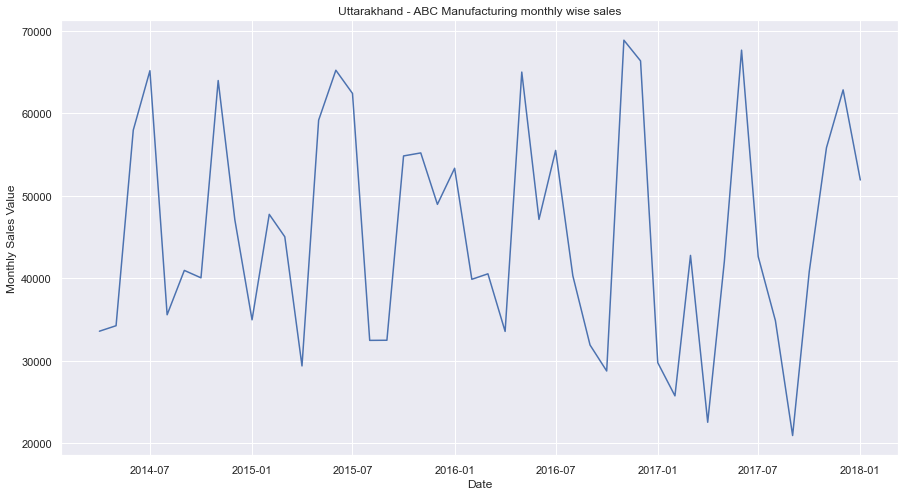

In [699]:
# Setting the figure size in seaborn
sns.set(rc = {'figure.figsize':(15,8)})

# Setting the background of the plot as dark
# sns.set(style="dark")

# Plotting line plot for Uttarakhand - ABC Manufacturing monthly wise sales 
sns.lineplot(x=df_Uttarakhand['Date'],
             y=df_Uttarakhand['Monthly Sales Value'],
             data=df_Uttarakhand).set(title='Uttarakhand - ABC Manufacturing monthly wise sales')

### Need to change the date column name to 'ds' and sales column name to 's' in the FbProphet, it is like rule

In [700]:
# Changing the column names 
df_Uttarakhand.columns = ['ds','y']
df_Uttarakhand.head()

ds         y
2353 2014-04-01  33580.71
2361 2014-05-01  34247.07
2359 2014-06-01  57970.22
2358 2014-07-01  65174.90
2354 2014-08-01  35574.53

In [701]:
# Creating the FbProphet model and fitting to the Data frame

model_Uttarakhand = Prophet()
model_Uttarakhand.fit(df_Uttarakhand)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### It is taking yearly seasonality as it observed, so disabled daily and weekly seasonality

In [702]:
# Component modes show what seasonality it has taken in the model
model_Uttarakhand.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [703]:
# Create future dates of 365 days

future_dates_Uttarakhand=model_Uttarakhand.make_future_dataframe(periods=12, freq = 'MS')

In [704]:
# Displaying future dates for the next 12 months

future_dates_Uttarakhand.tail()

ds
53 2018-09-01
54 2018-10-01
55 2018-11-01
56 2018-12-01
57 2019-01-01

In [705]:
# Doing the prediction using the model - FbProphet on the future dates.

prediction_Uttarakhand=model_Uttarakhand.predict(future_dates_Uttarakhand)

In [706]:
# Displaying the prediction results - yhat

prediction_Uttarakhand.head() 

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2014-04-01  50027.634420  22986.275875  38655.209721  50027.634420   
1 2014-05-01  49934.859232  42057.690341  57720.782454  49934.859232   
2 2014-06-01  49838.991537  53776.356820  70210.511424  49838.991537   
3 2014-07-01  49746.216349  52089.443063  67016.537030  49746.216349   
4 2014-08-01  49650.348655  27724.975716  43329.127475  49650.348655   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  50027.634420   -19517.564717         -19517.564717         -19517.564717   
1  49934.859232     -321.314679           -321.314679           -321.314679   
2  49838.991537    12626.104737          12626.104737          12626.104737   
3  49746.216349     9690.225620           9690.225620           9690.225620   
4  49650.348655   -14022.682052         -14022.682052         -14022.682052   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0 -19517.564717 -19517.564717 -19517.564717                   0.0   
1   -321.314679   -321.314679   -321.314679                   0.0   
2  12626.104737  12626.104737  12626.104737                   0.0   
3   9690.225620   9690.225620   9690.225620                   0.0   
4 -14022.682052 -14022.682052 -14022.682052                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  30510.069704  
1                         0.0                         0.0  49613.544552  
2                         0.0                         0.0  62465.096274  
3                         0.0                         0.0  59436.441969  
4                         0.0                         0.0  35627.666603

In [707]:
prediction_Uttarakhand[['ds','yhat']].head() # Predicted values for the Time Series

ds          yhat
0 2014-04-01  30510.069704
1 2014-05-01  49613.544552
2 2014-06-01  62465.096274
3 2014-07-01  59436.441969
4 2014-08-01  35627.666603

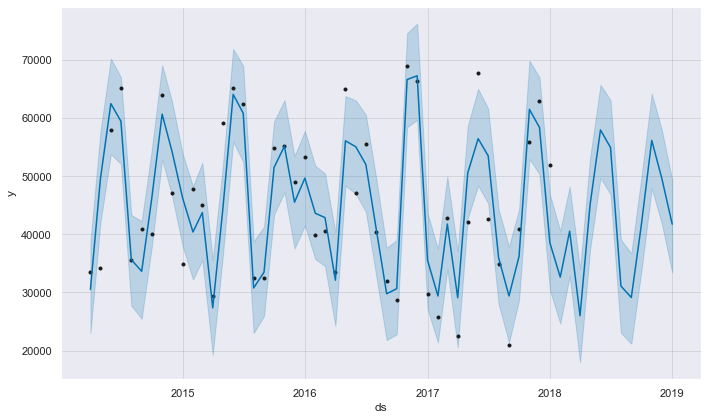

In [708]:
# Plot the predicted sales for next 365 days

plot_Uttarakhand = model_Uttarakhand.plot(prediction_Uttarakhand)

#### In this plot black dots are the Actual Sales Values
#### Blue line is the predicted line and it is predicted for next 365 days also
#### And the blue space around the blue line is the Trend

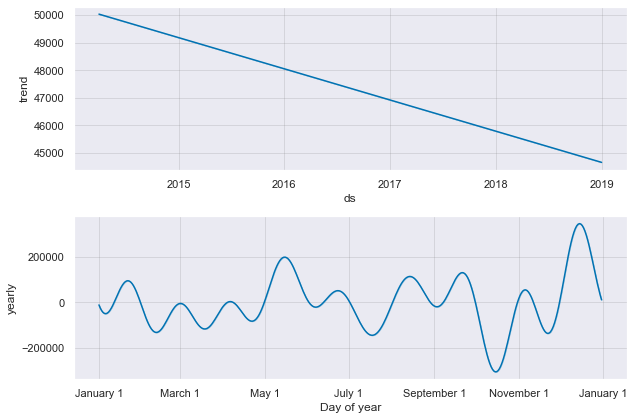

In [709]:
# Visualize Each Components[Trends,yearly]

plot_components_Uttarakhand = model_Uttarakhand.plot_components(prediction_Uttarakhand)

#### Trend for Uttarakhand is going down yearly
#### Yearly the graph was showing how each month the sales are doing

In [ ]:
# Doing cross validation on the Uttarakhand State Wise Sales

df_Uttarakhand_cv = cross_validation(model_Uttarakhand, initial='730 days', period='75 days', horizon = '150 days')
df_Uttarakhand_cv.head()

In [ ]:
# Doing performance metrics on the Uttarakhand State Wise Sales, i.e calculating mse, rmse,mae etc from cross validation

df_Uttarakhand_p = performance_metrics(df_Uttarakhand_cv)
df_Uttarakhand_p.head()

In [ ]:
# Plotting the validation results and RMSE for the 150 days of prediction

fig_Uttarakhand = plot_cross_validation_metric(df_Uttarakhand_cv, metric='rmse')

In [710]:
# Creating Data frame with actual & predicted value using Join

FbProphet_Uttarakhand = prediction_Uttarakhand.set_index('ds')[['yhat']].join(df_Uttarakhand.set_index('ds').y).reset_index()
FbProphet_Uttarakhand.dropna(inplace=True)
FbProphet_Uttarakhand.head()

ds          yhat         y
0 2014-04-01  30510.069704  33580.71
1 2014-05-01  49613.544552  34247.07
2 2014-06-01  62465.096274  57970.22
3 2014-07-01  59436.441969  65174.90
4 2014-08-01  35627.666603  35574.53

In [711]:
# Checking the RMSE of Prophet model

rmse_FbProphet_Uttarakhand =  np.sqrt(mean_squared_error(FbProphet_Uttarakhand.y[41:45], FbProphet_Uttarakhand.yhat[41:45]))
print(rmse_FbProphet_Uttarakhand)

6019.325801931392


In [713]:
mape_FbProphet_Uttarakhand = np.round(np.mean(np.abs(FbProphet_Uttarakhand.y[41:45]-FbProphet_Uttarakhand.yhat[41:45])/FbProphet_Uttarakhand.y[41:45])*100,2)
print(mape_FbProphet_Uttarakhand)

17.25
